# Spins coupled to a two-mode degenerate cavity

## Model overview

The full model has each atom with 5 Zeeman levels in the $\mathrm{Rb}\ 5S_{1/2}\ (F = 2)$ manifold (The "spin" that we care about), but also states in the $\mathrm{Rb}\ 5S_{1/2}\ (F = 1)$ manifold which we would like to repump back to $(F=2)$ ASAP (the repump light can be circular polarized), and states in the  $\mathrm{Rb}\ 5P_{3/2}$ manifold that we will use to drive Raman transitions to couple to the cavity. Each atom will be placed (pinned is a better word here because we will not be looking at the motion-spin coupling) at either a positive or a negative antinode of the cavity standing wave, and driven with a common drive field.

There are a hierarchy of approximations that I will be using, some are going to be hardcoded into the model, and some are going to be optional depending on what sections of parameter space we are concerned with. The hardcoded approximations are: 
1. Population in the $(F=1)$ ground state and in the excited states will be 0. This is the same as adiabatically eliminating the excited states so that we are left with groundstate-groundstate coupling. Dissipation via incoherent scattering from the excited state can be modeled as quantum jumps between the ground state Zeeman levels. 



The optional approximations are:
1. **Classical cavity fields**. This approximation is valid under three assumptions, that the atomic-cavity interaction is much slower than $1/\kappa$, the cavity mean photon number is high, and the cavity field is not obviously squeezed. 
    1. Fast cavity response requires $\kappa \gg g_{eff} = \frac{g\Omega}{\Delta}$. This is generally satistied. 
    2. High cavity photon number. This roughly asks for a photon detection rate above 1/us, which is generally satisfied.
    3. Non-squeezed light. Well, the Dicke interaction should ecourage squeezing of the cavity light. So this won't be accurate, but it's nontheless useful to see the atomic spin evolution by assuming a coherent cavity field. 
2. Modelling atom spins. There are a few different approximations one can make in different regimes:
    1. **The coherent regime**. Treat the sum of all atom spins as a classical spin. The Dicke Hamiltonian commutes with the total spin so Hamiltonian evolution doesn't take the total spin to other shells, while spontaneous scattering of single atom does. This approximation is valid if the atomic dynamics is much faster than the "Optical pumping rate" $\Gamma' = \Gamma \frac{\Omega^2}{\Delta^2}$. There are two time scales for atomic dynamics, one is just the Larmour frequency, the other is the cavity cooling timescale, which can be slower. In this regime, Hamiltonian dynamics + cavity cooling dominates. 
    2. **The intermediate regime**. Treat each atom as an individual spin object. There are two dynamics happening on the same timescale which could encourage or discourage bifurcation. There's optical pumping effect that will bias the individual spins based on the cavity polarization, and there's (Hamiltonian dynamics + cavity cooling) effects that will bias the spins towards lower (higher) energy for red (blue) pump-to-cavity detuning. For simiplity of computation, we can use a spin-$\frac{1}{2} chain rather than a spin-2 chain for this simulation.
    3. **The incoherent regime**. This approximation is valid only when the atomic-cavity interaction is much slower than $1/\Gamma'$, i.e. $\Gamma \frac{\Omega^2}{\Delta^2} \gg \frac{g\Omega}{\Delta}$, i.e. $\frac{\Omega}{\Delta} > \frac{g}{\Gamma} = 1/4$. This is only valid if we drive the atoms very strongly. In this regime we can model the single spins as classical spins, and decoherence can be modeled as demagnitization of single spins. 
    To sum up, my guess is that when $\frac{\Omega}{\Delta} < 0.1$, we are in the coherent regime and we can treat the spin chain as total (single-shell) spin; when $0.1 < \frac{\Omega}{\Delta} < 0.3$, we are in the intermediate regime when both coherent and incoherent forces are comparible, and we have to treat each spin as an individual quantum object (either spin-1/2 or spin-2); when $\frac{\Omega}{\Delta} > 0.3$, we are in the incoherent regime, optical pumping dominates and the system is fully classical to the point that we can model each spin as classical spin. 

It's helpful to establish a coordinate system. Let's name the cavity axis to be z, the drive light (side pump) axis to be x, and the vertical axis to be y. 
In the $Z_2$ model, the drive field will be y-polarized, and the static B field will point along x (or y); the y-polarization of the cavity field will be established by the "Rayleigh scattering" from the atoms, while the x-polarization of the cavity field will be setablished by the "Raman scattering" from the atoms. 
In the U(1) model, the drive field will be z-polarized, and the static B field will point along z; both x- and y- polarizations of the cavity field will be the result of atom Raman scattering. 


In the rest of this write-up, we are going to use spin-1/2 chain (unless it's classical) for simplicity.


## Aside: coherent VS incoherent "forces"


Here's a bold claim: what we refer to as coherent effects (the two light shift terms), are not so different from the optical pump terms, in the sense that they bthemselves do not cause the sytem to evolve towards the groundstate (or highest-energy state). It is dissipation from the cavity that either takes energy from or inject energy into the system (cavity cooling VS heating). If we look into the details of how cavity heating/cooling works, that where the cavity resonace is modifies the scattering probability of ending up in different $m_F$ states, it's also in a way how optical pumping works, by using the pump polarization and C-G coefficents to modify the scattering probability of ending up in different $m_F$ states. In both cases, (light shift + cavity cooling) and optical pumping, the dissipation structure is what sets the steady state of the system, and if such steady state evolution spontaneously breaks the symmetry of the system, we can say that the steady state bifurcates. 

There are four (anti)bifurcating forces at play: 
1. **Interference-light shift (the Dicke term)**  Pump-cavity interference creates locally circular polarized light at the atoms, which creates a ficticious B field that's perpendicular to the static B field (staggered for half-integer spaced array). This rotates the energy minimum/maximum on the Bloch sphere (in the direction) depending on the phase difference between the cavity field and the drive field, and this energy gradient ("force") is proportional to cavity field amplitude.
2. **Interference-optical pumping** Pump-cavity interference creates locally circular polarized light at the atoms, which optically pumps the atom spin towards the direction of circular polarization. This optical pump rate is proportional to cavity field amplitude.

The following two terms will be suppressed with half-integer spaced array, but can be significant for integer-spaced array, because they involve the cavity mode ifself being circularly polarized. In terms of simulation, I will assume that these terms don't exist for the half-integer spaced $Z_2$ model by modeling the cavity to have only the y-polarized mode. In terms of a hypothetical experiment, if the caviy has a large linear birefingence thats much larger than $\kappa$, it will also remove the following terms.

3. **Cavity-light shift** The x polarized cavity mode interfere with the y polarized cavity mode, i.e., the circular polarizied cavity modes, creates globally circular polarized light at the atoms. In the $Z_2$ model, This rotates the energy minimum/maximum on the Bloch sphere (in the direction) depending on the circularity of the cavity field. In the $U(1)$ model, this causes the Larmor frequency to increase/decrease depending on the circularity of the cavity field. This energy gradient ("force") is proportional to the intensity of the circular cavity field.
4. **Cavity-optical pumping** The x polarized cavity mode interfere with the y polarized cavity mode, i.e., the circular polarizied cavity modes, creates globally circular polarized light at the atoms. This causes optical pump along the cavity axis, at a rate that is proportional to the intensity of the circular cavity field. 

In the integer-spaced U(1) model, because the latter two terms are aligned with the static B field, they could either be boring, or could make the U(1) model a SU(2) model by having the cavity polarization extend to the entire Poincare sphere.


# Z_2 model with single cavity mode

## Hamiltonians and jump operators

As mentioned previously, the y-polarized cavity mode should be suppressed by subradiance, so we will write out only one cavity polarization. However, the full hamiltonian will still include the y-polarizatation cavity mode, which will be described in the "integer spacing $Z_2$" section.

The Hamiltonian for a spin-1/2 chain is:

$$ H = (-\delta + \delta_\text{cav}) a_x^\dagger a_x + \sum_n \left[ (\omega_L s_n^x - \bm{B_\text{fict}}\cdot\bm{s}_n) +g_\text{eff} s_n^z (-i a_x + i a_x^\dagger)  \right], \quad \text{where}\; g_\text{eff} = \frac{2}{3}\frac{g \Omega}{\Delta}$$

Note that:
1. $\delta_\text{cav} = \sum_n \frac{4}{3} \frac{g^2}{\Delta}$ is the cavity pulling term. In this single-mode $Z_2$ model it's not dependent on the atomic state, so it can be absorbed into $\delta$. This term is effectively zero. 
2. $\bm{B_\text{fict}}$ is the fictitous field from the drive light. In the spin-1/2 model if there's no tensor Stark shift and the vector stark shift is zero with linear polarized drive light. This term is effectively zero. 
3. Here $\Omega$ is defined by the Rabi frequency of  the stretched transition. Similarly, $g$ is defined by that of the streched state transition for convinience.
4. x and z are swapped when compared to the typical Dicke Hamiltonian, due to our naming of basis.
---
To write out the (post elimination) jump operators, we can set the quantization axis to be along cavity (z). In this basis, the local summed optical field can be projected onto the $\sigma^+$ and $\sigma^-$ light (here I'm assuming $\ket{1/2,1/2}\rightarrow\ket{3/2,-1/2}$ transition for convinience): 
$$ \Omega_{+} = \frac{ \Omega - 2i g a_x }{\sqrt{6}}, \quad \Omega_- = \frac{\Omega + 2i g a_x }{\sqrt{6}}$$
Which gives the effective decay rates for each single atom (only in the spin-1/2 model, otherwise there will also be $m_F \pm2$ processes):
$$
\sqrt{\gamma_{\frac{1}{2}\leftarrow\frac{-1}{2}}} =  \left|\frac{\Omega_+}{\Delta}\right|\sqrt{\frac{1}{4}\frac{2}{3}\Gamma}   ,\quad
\gamma_{\frac{-1}{2}\leftarrow\frac{1}{2}} = \frac{1}{6} \left| \frac{\Omega_-}{\Delta} \right|^2 \Gamma ,\quad
\gamma_{\frac{1}{2}\leftarrow\frac{1}{2}} = \left[ \frac{3}{4} \left| \frac{\Omega_+}{\Delta} \right|^2 + \frac{1}{12} \left| \frac{\Omega_-}{\Delta} \right|^2 \right] \Gamma ,\quad
\gamma_{\frac{-1}{2}\leftarrow\frac{-1}{2}} = \left[ \frac{3}{4} \left| \frac{\Omega_-}{\Delta} \right|^2 + \frac{1}{12} \left| \frac{\Omega_+}{\Delta} \right|^2 \right] \Gamma
$$
Thus the Lindblad jump operators are $L_{k\leftarrow j} = \sqrt{\gamma_{k\leftarrow j}} \ket{k}\bra{j}$, respectively. 
$$
\begin{aligned}
L_{\frac{1}{2}\leftarrow\frac{-1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sqrt{\left(\Omega +2 g \, \textbf{Im}(a_x) \right)^2 + (2 g \, \textbf{Re}(a_x))^2}  \ket{\frac{1}{2}}\bra{\frac{-1}{2}} \\
L_{\frac{-1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta}  \sqrt{\left(\Omega -2 g \, \textbf{Im}(a_x) \right)^2 + (2 g \, \textbf{Re}(a_x))^2}\ket{\frac{-1}{2}}\bra{\frac{1}{2}}\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{5 \Gamma}}{6 \Delta}  \sqrt{\Omega^2 + \frac{16}{5} \Omega g \textbf{Im}(a_x) + 4 g^2 |a_x|^2 } \ket{\frac{1}{2}}\bra{\frac{1}{2}} \\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}} &= \frac{\sqrt{5 \Gamma}}{6 \Delta} \sqrt{\Omega^2 - \frac{16}{5} \Omega g \textbf{Im}(a_x) + 4 g^2 |a_x|^2 } \ket{\frac{-1}{2}}\bra{\frac{-1}{2}} \\
\end{aligned}
$$
 <!-- In the limit that $|\Omega|\gg |g a_x |$ that we are in, assuming $\Omega$, $g$ are real, we have:
$$
\begin{aligned}
L_{\frac{1}{2}\leftarrow\frac{-1}{2}} &\simeq \frac{\sqrt{\Gamma}}{6 \Delta} \left(\Omega +2 g \, \textbf{Im}(a_x) \right) \ket{\frac{1}{2}}\bra{\frac{-1}{2}} \\
L_{\frac{-1}{2}\leftarrow\frac{1}{2}} &\simeq \frac{\sqrt{\Gamma}}{6 \Delta}  \left(\Omega -2 g \, \textbf{Im}(a_x) \right) \ket{\frac{-1}{2}}\bra{\frac{1}{2}}\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}} &\simeq \frac{\sqrt{5 \Gamma}}{6 \Delta} \left(\Omega +\frac{8}{5} g \, \textbf{Im}(a_x) \right) \ket{\frac{1}{2}}\bra{\frac{1}{2}} \\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}} &\simeq \frac{\sqrt{5 \Gamma}}{6 \Delta} \left(\Omega -\frac{8}{5} g \, \textbf{Im}(a_x) \right) \ket{\frac{-1}{2}}\bra{\frac{-1}{2}} \\
\end{aligned}
$$ -->

 Note that inside $\Omega_+$ and $\Omega_-$ there are cavity jump operators as well, which means that if we don't treat the cavity field as classical, we'll need to expand these jump operators in the direct product basis. 
 <!-- If we assume $g\langle a_x\rangle \ll \Omega$, we can throw away the second-order cavity field terms (this part I'm not too sure about why they are there in the first place).  -->
$$
\begin{aligned}
L_{\frac{1}{2}\leftarrow\frac{-1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sum_m\left(\Omega \ket{\frac{1}{2}, m}\bra{\frac{-1}{2}, m} - 2i g\sqrt{m} \ket{\frac{1}{2}, m-1}\bra{\frac{-1}{2}, m}  \right)\\
L_{\frac{-1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sum_m\left(\Omega \ket{\frac{-1}{2}, m}\bra{\frac{1}{2}, m} + 2i g\sqrt{m} \ket{\frac{-1}{2}, m-1}\bra{\frac{1}{2}, m}  \right)\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}}^{(1)} &= \frac{\sqrt{\Gamma}}{2\sqrt{2} \Delta} \sum_m\left(\Omega \ket{\frac{1}{2}, m}\bra{\frac{1}{2}, m} - 2i g\sqrt{m} \ket{\frac{1}{2}, m-1}\bra{\frac{1}{2}, m}  \right)\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}}^{(2)} &= \frac{\sqrt{\Gamma}}{6\sqrt{2}  \Delta} \sum_m\left(\Omega \ket{\frac{1}{2}, m}\bra{\frac{1}{2}, m} + 2i g\sqrt{m} \ket{\frac{1}{2}, m-1}\bra{\frac{1}{2}, m}  \right)\\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}}^{(1)} &= \frac{\sqrt{\Gamma}}{2\sqrt{2}  \Delta} \sum_m\left(\Omega \ket{\frac{-1}{2}, m}\bra{\frac{-1}{2}, m} + 2i g\sqrt{m} \ket{\frac{-1}{2}, m-1}\bra{\frac{-1}{2}, m}  \right)\\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}}^{(2)} &= \frac{\sqrt{\Gamma}}{6\sqrt{2} \Delta} \sum_m\left(\Omega \ket{\frac{-1}{2}, m}\bra{\frac{-1}{2}, m} - 2i g\sqrt{m} \ket{\frac{-1}{2}, m-1}\bra{\frac{-1}{2}, m}  \right)
\end{aligned}
$$

<!-- $$
L_{\frac{1}{2}\leftarrow\frac{1}{2}}^{(tot)} &\simeq \frac{\sqrt{5 \Gamma}}{3\sqrt{2} \Delta} \sum_m\left(\Omega \ket{\frac{1}{2}, m}\bra{\frac{1}{2}, m} - \frac{8}{5} i g\sqrt{m} \ket{\frac{1}{2}, m-1}\bra{\frac{1}{2}, m}  \right)\\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}}^{(tot)} &\simeq \frac{\sqrt{5 \Gamma}}{3\sqrt{2} \Delta} \sum_m\left(\Omega \ket{\frac{-1}{2}, m}\bra{\frac{-1}{2}, m} + \frac{8}{5} i g\sqrt{m} \ket{\frac{-1}{2}, m-1}\bra{\frac{-1}{2}, m}  \right)\\
$$ -->

<!-- Note that we can either use the $(1)$ and $(2)$ superscripted operators, or the $(tot)$ operators as a justified approximation. In the former case there are six composite jump operators, and the the latter case there are two.  -->

In addition, the cavity-to-freespace jump operator $L_\text{cav} = \sqrt{\kappa}\, a_x$. I'm using the convention where $\kappa$ and $\Gamma$ are FWHM.



# Treating the spins as a single collective spin

---

### classic total spin in classical cavity (coherent regime)
---
As discussed before, the system can be approximated as the on-shell evolution of the total spin $\bm{S}$ in the coherent limit. This is equivalent to neglecting all the jump operators except for $L_\text{cav}$. In this section we will write down the equation of motion of the total spin coupled to a harmonic osillator in both the classical and quantum mechanical language (where squeezing can occur). 

Let's rewrite the Master equation in this regime:

$$ H = -\delta  a_x^\dagger a_x + \omega_L S^x +g_\text{eff} S^z (i a_x^\dagger -i a_x) ,\quad L_\text{cav} = \sqrt{\kappa}\, a_x$$ 
$\text{where}\;  g_\text{eff } = \frac{2}{3}\frac{g \Omega}{\Delta}$

$$\frac{d\rho}{dt} = -i \left[ -\delta\, a_x^\dagger a_x + \omega_L S^x + g_\text{eff } S^z (i a_x^\dagger -i a_x), \rho \right] + \kappa \left( a_x \rho a_x^\dagger - \frac{1}{2} \left\{ a_x^\dagger a_x, \rho \right\} \right)$$

where $\rho$ is a $N+1 \times M$ dimensional tensor, where $M$ is the truncated Fock state basis dimension of the cavity. 

---

From the Master equation above, we can write out the classical equations of motion for $\langle a_x \rangle = \alpha_r + i \alpha_i $, $\langle \bm{S} \rangle = S^x \bm{e}_x + S^y \bm{e}_y + S^z \bm{e}_z$ after mean-field approximation. 
<!-- old and obsolete
$$
\left\{
\begin{aligned}
\frac{d\alpha_r}{dt} &= \delta\, \alpha_i - \frac{\kappa}{2} \alpha_r \\
\frac{d\alpha_i}{dt} &= -\delta\, \alpha_r - \frac{\kappa}{2} \alpha_i  + g_\text{eff } S^Z \\
\frac{dS^X}{dt} &= -2 g_\text{eff } \alpha_r\, S^Y \\
\frac{dS^Y}{dt} &= 2 g_\text{eff } \alpha_r\, S^X - \omega_L S^Z \\
\frac{dS^Z}{dt} &= \omega_L S^Y
\end{aligned}
\right.
$$
-->

$$
\left\{
\begin{aligned}
\frac{d\alpha_r}{dt} &= -\delta\, \alpha_i - \frac{\kappa}{2} \alpha_r + g_\text{eff } S^Z \\
\frac{d\alpha_i}{dt} &= \delta\, \alpha_r - \frac{\kappa}{2} \alpha_i \\
\frac{dS^X}{dt} &= -2 g_\text{eff } \alpha_i\, S^Y \\
\frac{dS^Y}{dt} &= 2 g_\text{eff } \alpha_i\, S^X - \omega_L S^Z \\
\frac{dS^Z}{dt} &= \omega_L S^Y
\end{aligned}
\right.
$$


This is ssuming the total spin is always on the outermost shell and in a spin-coherent state. The cavity mode is assumed to be also in coherent state. Let's solve this in standard scipy ODE solver next. 

---

P.S. Theoretically, the phase transition would occur at $g_\text{eff } = \sqrt{\frac{|\delta| \omega_L}{N}}$. If there's comparible $\kappa$, then (I think) at $g_\text{eff } = \sqrt{\frac{\sqrt{\delta^2 + (\kappa/2)^2} \omega_L}{N}}$.

<!-- P.S. here's the further simplification by adiabatically elliminating the cavity field (assuming $\kappa \gg g_\text{eff }$): -->

#### adding atomic jump operators

---

Although individual atom decay will take the total spin off of the outermost shell (the Dicke bright states), we can still model the statistical effect of these decays using mean-field approximation, and model it as three processes on the total spin: optical pumping; optical depumping; and dephasing. For this we will look at the lindblad jump operators in the full masters Equation:

$$
\begin{aligned}
\frac{d\rho}{dt} = -i \left[-\delta  a_x^\dagger a_x + \sum_n \left( \omega_L s_n^x  +g_\text{eff} s_n^z (i a_x^\dagger -i a_x)  \right), \rho \right] + \kappa \left( a_x \rho a_x^\dagger - \frac{1}{2} \left\{ a_x^\dagger a_x, \rho \right\} \right) \\
+ \sum_n \left[ A_+ \left( \sigma_n^+ \rho \sigma_n^- - \frac{1}{2} \left\{ P_n^{\downarrow}, \rho \right\} \right)
+  A_- \left( \sigma_n^- \rho \sigma_n^+ - \frac{1}{2} \left\{ P_n^{\uparrow}, \rho \right\} \right) \right.\\
\left. + B_+ \left( P_n^{\uparrow} \rho P_n^{\uparrow} - \frac{1}{2} \left\{ P_n^{\uparrow}, \rho \right\} \right)
+ B_- \left( P_n^{\downarrow} \rho P_n^{\downarrow} - \frac{1}{2} \left\{ P_n^{\downarrow}, \rho \right\} \right) \right]\\
\end{aligned}
$$

Where:
<!-- \sqrt{\left(\Omega -2 g \, \textbf{Im}(a_x) \right)^2 + (2 g \, \textbf{Re}(a_x))^2}\ket{\frac{-1}{2}}\bra{\frac{1}{2}}\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{5 \Gamma}}{3\sqrt{2} \Delta}  \sqrt{\Omega^2 + \frac{16}{5} \Omega g \textbf{Im}(a_x) + 4 g^2 |a_x|^2 } -->

$$
A_{\pm} = \frac{\Gamma}{36 \Delta^2} \left[\left(\Omega \pm 2 g \, \textbf{Im}(a_x) \right)^2 + (2 g \, \textbf{Re}(a_x))^2 \right],\quad
B_{\pm} = \frac{5\Gamma}{36 \Delta^2} \left[\Omega^2 \pm \frac{16}{5} \Omega g \textbf{Im}(a_x) + 4 g^2 |a_x|^2\right]
$$


$$
A_{\pm} = \frac{\Gamma}{36 \Delta^2} \left( \Omega \pm 2g\, \text{Im}(\alpha_x) \right)^2,\quad
B_{\pm} = \frac{5\Gamma}{36 \Delta^2} \left( \Omega \pm \tfrac{8}{5}g\, \text{Im}(\alpha_x) \right)^2
$$

---

Use the general formula for Lindblad evolution:

$$
\frac{d}{dt} \langle O \rangle\Big|_{\text{diss}} = \langle L^\dagger [O, L] + [L^\dagger, O]L \rangle
$$

We get:

$$
\frac{d}{dt} \langle s_n^x \rangle\Big|_{\text{diss}} = - \left( A_+ + A_- + B_+ + B_- \right) \langle s_n^x \rangle
$$



$$
\frac{d}{dt} \langle s_n^y \rangle\Big|_{\text{diss}} = -\left( A_+ + A_- + B_+ + B_- \right) \langle s_n^y \rangle
$$


$$
\frac{d}{dt} \langle s_n^z \rangle\Big|_{\text{diss}} = \frac{1}{2} (A_+ - A_-) N - (A_+ + A_-) \langle s_n^z \rangle
$$

(_Note_: $ B_\pm $ cancel in $ s_n^z $ evolution since they are purely dephasing terms.)

---

Then we can add these terms to the classical equations of motion from the previous section:

$$
\left\{
\begin{aligned}
\frac{d\alpha_r}{dt} &= -\delta\, \alpha_i - \frac{\kappa}{2} \alpha_r + g_{\text{eff}} S^z \\
\frac{d\alpha_i}{dt} &= \delta\, \alpha_r - \frac{\kappa}{2} \alpha_i \\
\frac{dS^x}{dt} &= -2g_{\text{eff}} \alpha_i S^y - \gamma_s(\alpha) S^x \\
\frac{dS^y}{dt} &= 2g_{\text{eff}} \alpha_i S^x - \omega_L S^z - \gamma_s(\alpha) S^y \\
\frac{dS^z}{dt} &= \omega_L S^y + \frac{N}{2} \Gamma_{op}(\alpha_i) - \gamma_p(\alpha) S^z
\end{aligned}
\right.
$$

Where:
- $ \gamma_s(\alpha) = (A_+ + A_- + B_+ + B_-) =  \frac{\Gamma}{3 \Delta^2} \left( \Omega^2 + 4 g^2 \alpha_i^2 + 4 g^2 \alpha_r^2 \right)$        — **spin dephasing rate**

- $ \gamma_p(\alpha) = (A_+ + A_-) = \frac{\Gamma}{18 \Delta^2} \left( \Omega^2 + 4 g^2 \alpha_i^2 + 4 g^2 \alpha_r^2 \right) $          — **spin depumping rate**

- $ \Gamma_{op}(\alpha_i) = (A_+ - A_-) = \frac{2 \Gamma}{9 \Delta^2} g\Omega \alpha_i $          — **optical pumping rate**

We could throw away the $g^2 \alpha_i^2$ terms because we are in the $g\alpha \ll \Omega$ limit, but might as well just keep them.




---

We can adiabatically elliminate the cavity field by setting its derivative to 0:

### Location and Stability of Fixed Points

---

We consider a spin ensemble with collective spin operators \( \vec{S} = (S^x, S^y, S^z) \) dispersively coupled to a lossy cavity. In the bad cavity limit, the cavity field amplitude \( \alpha = \alpha_r + i\alpha_i \) is slaved to the spin via:

$$
\begin{align}
\alpha_r(S^z) &= \frac{2 g_{\text{eff}} \kappa S^z}{4\delta^2 + \kappa^2} \\
\alpha_i(S^z) &= \frac{4 \delta\, g_{\text{eff}} S^z}{4\delta^2 + \kappa^2}
\end{align}
$$

The spin equations of motion after adiabatic elimination are:

$$
\begin{align}
\frac{dS^x}{dt} &= -2 g_{\text{eff}} \alpha_i(S^z) S^y - \gamma_s(\alpha) S^x \\
\frac{dS^y}{dt} &= \phantom{-}2 g_{\text{eff}} \alpha_i(S^z) S^x - \omega_L S^z - \gamma_s(\alpha) S^y \\
\frac{dS^z}{dt} &= \omega_L S^y + \frac{N}{2} \Gamma_{\text{op}}(\alpha_i) - \gamma_p(\alpha) S^z
\end{align}
$$

The dissipation rates are given by:

$$
\begin{align}
\gamma_s(\alpha) &= \frac{\Gamma}{3\Delta^2} \left( \Omega_{\text{rabi}}^2 + 4 g_{\text{max}}^2 (\alpha_r^2 + \alpha_i^2) \right) \\
\gamma_p(\alpha) &= \frac{\Gamma}{18\Delta^2} \left( \Omega_{\text{rabi}}^2 + 4 g_{\text{max}}^2 (\alpha_r^2 + \alpha_i^2) \right) \\
\Gamma_{\text{op}}(\alpha_i) &= \frac{2\Gamma}{9\Delta^2} g_{\text{max}} \Omega_{\text{rabi}} \alpha_i
\end{align}
$$

Let us define $ A \equiv 4\delta^2 + \kappa^2 $ for compact notation.

---

Fixed points are defined by setting time derivatives to zero:

$$
\begin{align}
0 &= -2 g_{\text{eff}} \alpha_i(S^z) S^y - \gamma_s(\alpha) S^x \\
0 &= \phantom{-}2 g_{\text{eff}} \alpha_i(S^z) S^x - \omega_L S^z - \gamma_s(\alpha) S^y \\
0 &= \omega_L S^y + \frac{N}{2} \Gamma_{\text{op}}(\alpha_i) - \gamma_p(\alpha) S^z
\end{align}
$$

We can also write this as a order-3 equation of $(S^z)^2$. See mathematica notebook.

---
To assess linear stability, we compute the Jacobian matrix:

$$
J_{ij} = \frac{\partial}{\partial S^j} \left( \frac{dS^i}{dt} \right)
\quad \text{for } i,j \in \{x,y,z\}
$$

We obtain:

$$
J = 
\begin{pmatrix}
J_{11} & J_{12} & J_{13} & J_{14} & J_{15} \\
J_{21} & J_{22} & J_{23} & J_{24} & J_{25} \\
J_{31} & J_{32} & J_{33} & J_{34} & J_{35} \\
J_{41} & J_{42} & J_{43} & J_{44} & J_{45} \\
J_{51} & J_{52} & J_{53} & J_{54} & J_{55}
\end{pmatrix}
$$

with elements:

$$
\begin{align}
J_{11} &= -\frac{\kappa}{2} \\
J_{12} &= -\delta \\
J_{13} &= 0 \\
J_{14} &= 0 \\
J_{15} &= g_{\text{eff}} \\
\\
J_{21} &= \delta \\
J_{22} &= -\frac{\kappa}{2} \\
J_{23} &= 0 \\
J_{24} &= 0 \\
J_{25} &= 0 \\
\\
J_{31} &= -S_x \frac{d\gamma_s}{d\alpha_r} \\
J_{32} &= -2 g_{\text{eff}} S_y - S_x \frac{d\gamma_s}{d\alpha_i} \\
J_{33} &= -\gamma_s(\alpha_i, \alpha_r) \\
J_{34} &= -2 g_{\text{eff}} \alpha_i \\
J_{35} &= 0 \\
\\
J_{41} &= -S_y \frac{d\gamma_s}{d\alpha_r} \\
J_{42} &= 2 g_{\text{eff}} S_x - S_y \frac{d\gamma_s}{d\alpha_i} \\
J_{43} &= 2 g_{\text{eff}} \alpha_i \\
J_{44} &= -\gamma_s(\alpha_i, \alpha_r) \\
J_{45} &= -\omega_L \\
\\
J_{51} &= -S_z \frac{d\gamma_p}{d\alpha_r} \\
J_{52} &= -S_z \frac{d\gamma_p}{d\alpha_i} + \frac{N}{2} \frac{d\Gamma_{\text{op}}}{d\alpha_i} \\
J_{53} &= 0 \\
J_{54} &= \omega_L \\
J_{55} &= -\gamma_p(\alpha_i, \alpha_r)
\end{align}
$$



---

Let $ \lambda_i $ be the eigenvalues of  $J$. The fixed point is:


  1. **Stable** if $ \text{Re}(\lambda_i) < 0 $ for all  i ,
  2. **Unstable** if any $ \text{Re}(\lambda_i) > 0 $,
  3. **Marginally stable** if $ \text{Re}(\lambda_i) = 0 $ for some i, and the rest are negative.




## fixed points analysis

### no atomic local decay

---
from the following code cell, we can see the bevavior of a textbook Dicke phase transition. The solid black line segments are where the stable solutions reside. The stable points should be blue, but they show up green because in the textbook Dicke phase transition, all dynamics are on-shell, meaning they will always have a zero derivative along the radial direction of the total spin. 

Found 55 unique fixed points.

Fixed point 1: Sx = -2.6428, Sy = 0.0000, Sz = -15.7857 --> Marginal
  Eigenvalues: [-3.1216 +7.4037j -3.1216 -7.4037j -0.02  +19.0765j -0.02  -19.0765j
  0.     +0.j    ]

Fixed point 2: Sx = -2.6428, Sy = 0.0000, Sz = -14.5714 --> Marginal
  Eigenvalues: [-3.1133 +7.3783j -3.1133 -7.3783j -0.0283+17.6677j -0.0283-17.6677j
  0.     +0.j    ]

Fixed point 3: Sx = -2.6428, Sy = 0.0000, Sz = -13.3571 --> Marginal
  Eigenvalues: [-3.1003 +7.3452j -3.1003 -7.3452j -0.0413+16.2675j -0.0413-16.2675j
  0.     +0.j    ]

Fixed point 4: Sx = -2.6428, Sy = -0.0000, Sz = -12.1429 --> Marginal
  Eigenvalues: [-3.0791 +7.3015j -3.0791 -7.3015j -0.0625+14.879j  -0.0625-14.879j
  0.     +0.j    ]

Fixed point 5: Sx = -2.6428, Sy = -0.0000, Sz = -10.9286 --> Marginal
  Eigenvalues: [-3.0428 +7.2431j -3.0428 -7.2431j -0.0988+13.5066j -0.0988-13.5066j
  0.     +0.j    ]

Fixed point 6: Sx = -2.6428, Sy = 0.0000, Sz = -9.7143 --> Marginal
  Eigenvalues: [-2.9778 +7.1648j -2

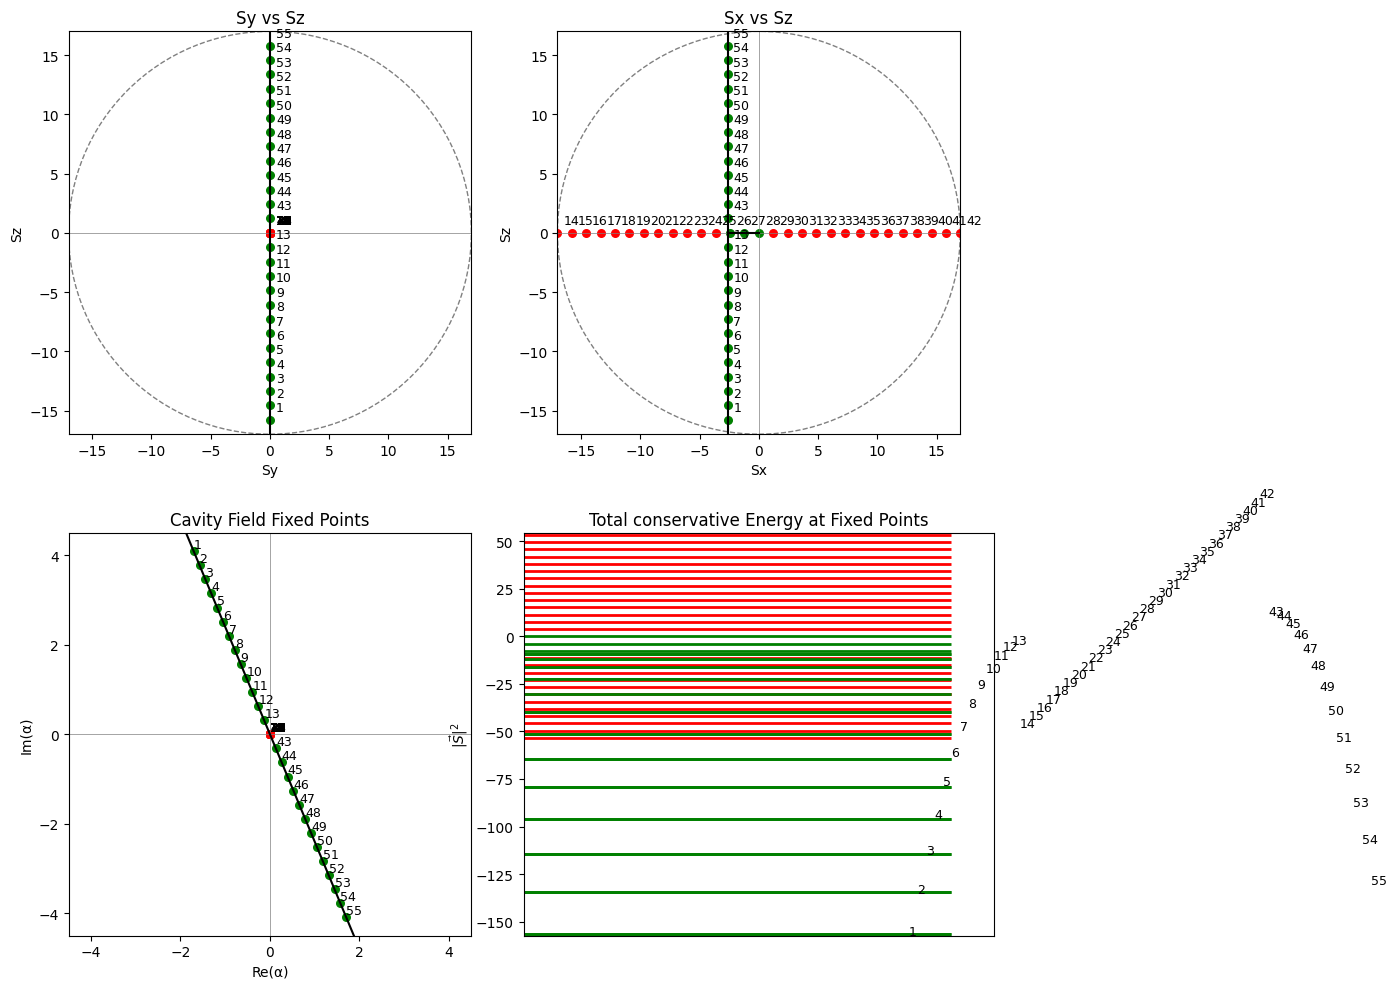

In [2]:
import numpy as np
from scipy.optimize import root
from scipy.linalg import eigvals
import itertools
import matplotlib.pyplot as plt


####################### Pump strength ########################
# effective coupling g_eff = Omega_Rabi * g / (3 * Delta)

g_eff = 2 * np.pi * 0.365  # above textbook Dicke phase transition   
# g_eff = 2 * np.pi * 0.15  # slightly above textbook Dicke phase transition    
# g_eff = 2 * np.pi * 0.12  # below textbook Dicke phase transition    

#########################################################
######################## Atomic decay on/off ########################
# Atomic decay parameters
# Gamma = 2*np.pi*6.0        # 5P decay raten    
Gamma = 0       # turn off atomic decay for this simulation
#####################################################################



# Parameters (in MHz and us)
delta = -2 * np.pi * 1.2      # detuning
kappa = 2 * np.pi * 1.0       # cavity decay rate
omega_L = 2 * np.pi * 0.5     # Larmor frequency
N_spin = 34                   # number of spin-1/2 particles

Delta = -2 * np.pi * 50.0      # detuning from probe laser to atomic transition
g_max = 2 * np.pi * 3          # maximum coupling strength
Omega_rabi = 3 * Delta * g_eff / (g_max * 2)

A = 4 * delta ** 2 + kappa ** 2

# -------------------------------
# Optical coefficients (dependent on all Sx, Sy, Sz)
# -------------------------------
def gamma_s(ai, ar):
    return (Gamma / (3 * Delta ** 2)) * (Omega_rabi ** 2 + 4 * g_max ** 2 * (ar ** 2 + ai ** 2))

def gamma_p(ai, ar):
    return (Gamma / (18 * Delta ** 2)) * (Omega_rabi ** 2 + 4 * g_max ** 2 * (ar ** 2 + ai ** 2))

def Gamma_op(ai):
    return (2 * Gamma / (9 * Delta ** 2)) * g_max * Omega_rabi * ai

def energy_spin (Sx, Sy, Sz):
    return omega_L * Sx
def energy_cavity(ar, ai):
    return -delta * (ar**2 + ai**2)
def energy_interaction(Sx, Sy, Sz, ar, ai):
    return 2 * g_eff * Sz * ai

# -------------------------------
# Equations of motion (corrected)
# -------------------------------
def steady_state_eqs(X):
    Sx, Sy, Sz = X
    ar = alpha_r(Sz)
    ai = alpha_i(Sz)
    
    # dalpha_r = -delta * ai - kappa / 2 * ar + g_eff * Sz
    # dalpha_i = delta * ar - kappa / 2 * ai
    dSx = -2 * g_eff * ai * Sy - gamma_s(ai, ar) * Sx
    dSy = 2 * g_eff * ai * Sx - omega_L * Sz - gamma_s(ai, ar) * Sy
    dSz = omega_L * Sy + (N_spin / 2) * Gamma_op(ai) - gamma_p(ai, ar) * Sz

    return [dSx, dSy, dSz]

# -------------------------------
# Optical coefficients (in terms of Sz)
# -------------------------------
def alpha_r(Sz):
    return (2 * g_eff * kappa * Sz) / A

def alpha_i(Sz):
    return (4 * delta * g_eff * Sz) / A

# -------------------------------
# Root finding (now only 3D search)
# -------------------------------
def find_all_fixed_points(grid_pts=21, tol=1e-6):
    guesses = np.linspace(-N_spin / 2, N_spin / 2, grid_pts)
    all_solutions = []

    for guess in itertools.product(guesses, repeat=3):  # now we have 3 variables
        sol = root(steady_state_eqs, guess, method='hybr')
        if sol.success:
            point = np.round(sol.x, decimals=6)
            if not any(np.allclose(point, p, atol=tol) for p in all_solutions):
                if np.linalg.norm(point) <= N_spin / 2:  # ensure within the sphere
                    all_solutions.append(point)

    return all_solutions


# -------------------------------
# Jacobian calculation (in 5D)
# -------------------------------
def stability_analysis(X):
    Sx, Sy, Sz = X
    ar = alpha_r(Sz)
    ai = alpha_i(Sz)
    
    

    dgamma_s_dar = (Gamma / (3 * Delta**2)) * 8 * g_max**2 * ar 
    dgamma_s_dai = (Gamma / (3 * Delta**2)) * 8 * g_max**2 * ai 
    dgamma_p_dar = (Gamma / (18 * Delta**2)) * 8 * g_max**2 * ar
    dgamma_p_dai = (Gamma / (18 * Delta**2)) * 8 * g_max**2 * ai
    dGamma_op_dai = (2 * Gamma / (9 * Delta**2)) * g_max * Omega_rabi 
    

    # Calculate the Jacobian matrix based on the correct equations of motion
    J = np.zeros((5, 5))  # now we have 5 variables to consider

    # dalpha_r/dt
    J[0, 0] = -kappa / 2
    J[0, 1] = -delta  # derivative w.r.t. ai
    J[0, 2] = 0  # derivative w.r.t. Sx
    J[0, 3] = 0  # derivative w.r.t. Sy
    J[0, 4] = g_eff  # derivative w.r.t. Sz

    # dalpha_i/dt
    J[1, 0] = delta  # derivative w.r.t. Sx
    J[1, 1] = -kappa / 2
    J[1, 2] =  0
    J[1, 3] = 0  
    J[1, 4] = 0

    # dSx/dt
    J[2, 0] = -Sx * dgamma_s_dar 
    J[2, 1] = -2 * g_eff * Sy  -Sx * dgamma_s_dai 
    J[2, 2] = - gamma_s(ai, ar) # derivative w.r.t. Sx
    J[2, 3] = -2 * g_eff * ai  # derivative w.r.t. Sy
    J[2, 4] = 0

    # dSy/dt
    J[3, 0] = -Sy * dgamma_s_dar 
    J[3, 1] = 2 * g_eff * Sx -Sy * dgamma_s_dai 
    J[3, 2] = 2 * g_eff * ai  # derivative w.r.t. Sx
    J[3, 3] = - gamma_s(ai, ar) # derivative w.r.t. Sy
    J[3, 4] = - omega_L  # derivative w.r.t. Sz

    # dSz/dt
    J[4, 0] = -Sz * dgamma_p_dar 
    J[4, 1] = -Sz * dgamma_p_dai + N_spin / 2 * dGamma_op_dai 
    J[4, 2] = 0
    J[4, 3] = omega_L  # derivative w.r.t. Sy
    J[4, 4] = -gamma_p(ai, ar)  # derivative w.r.t. Sz

    eigs = eigvals(J)
    return eigs



# -------------------------------
# Classify and collect fixed points
# -------------------------------
def classify_stability(eigs, tol=1e-6):
    real_parts = np.real(eigs)
    if np.all(real_parts < -tol):
        return "Stable"
    elif np.any(real_parts > tol):
        return "Unstable"
    else:
        return "Marginal"

# -------------------------------
# Run everything
# -------------------------------
fixed_points = find_all_fixed_points(grid_pts=29)
fixed_points.sort(key=lambda pt: pt[2])  # Sort by Sz
print(f"Found {len(fixed_points)} unique fixed points.\n")

for i, pt in enumerate(fixed_points, 1):
    eigs = stability_analysis(pt)
    status = classify_stability(eigs)
    print(f"Fixed point {i}: Sx = {pt[0]:.4f}, Sy = {pt[1]:.4f}, Sz = {pt[2]:.4f} --> {status}")
    print(f"  Eigenvalues: {np.round(eigs, 4)}\n")



fixed_points_info = []
for pt in fixed_points:
    eigs = stability_analysis(pt)
    status = classify_stability(eigs)
    # energy = np.linalg.norm(pt)**2  # total spin "energy" (for visualization)
    fixed_points_info.append({
        "coords": pt,
        "eigvals": eigs,
        "status": status,
        # "energy": energy
    })

# Color mapping
color_map = {"Stable": "blue", "Unstable": "red", "Marginal": "green"}

# Recompute all quantities including correct energy
Sxs = []
Sys = []
Szs = []
alphas_r = []
alphas_i = []
energies = []
colors = []
labels = []

for i, fp in enumerate(fixed_points_info):
    Sx, Sy, Sz = fp["coords"]
    ar = alpha_r(Sz)
    ai = alpha_i(Sz)

    E_spin = energy_spin(Sx, Sy, Sz)
    E_cav = energy_cavity(ar, ai)
    E_int = energy_interaction(Sx, Sy, Sz, ar, ai)
    total_energy = E_spin + E_cav + E_int

    Sxs.append(Sx)
    Sys.append(Sy)
    Szs.append(Sz)
    alphas_r.append(ar)
    alphas_i.append(ai)
    energies.append(total_energy)
    colors.append(color_map[fp["status"]])
    labels.append(f"{i+1}")

# Plotting


plotzoom = 1
fig = plt.figure(figsize=(14, 10))
# -------------------------------
# Top left: 2D Sy vs Sz plot
# -------------------------------
ax1 = fig.add_subplot(2, 2, 1)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
circle = plt.Circle((0, 0), N_spin/2, color='gray', fill=False, linestyle='--')
ax1.add_patch(circle)
ax1.set_xlim(-N_spin/2/plotzoom, N_spin/2/plotzoom)
ax1.set_ylim(-N_spin/2/plotzoom, N_spin/2/plotzoom)
ax1.set_aspect('equal')
ax1.set_title("Sy vs Sz")
ax1.set_xlabel("Sy")
ax1.set_ylabel("Sz")
ax1.plot(np.zeros(21), np.linspace(-N_spin/2,N_spin/2,21), '-', color='k')  # plot for the steady state line of Gamma = 0

for i, (Sy, Sz, c, label) in enumerate(zip(Sys, Szs, colors, labels)):
    ax1.scatter(Sy, Sz, color=c, s=30)
    offset = 0.5  # distance away from point
    point_offset = 0
    if (Sy**2 +Sz**2)<1: point_offset = 1.5
    ax1.text(Sy*(1+point_offset) + offset , Sz*(1+point_offset) + offset, f"{label}", fontsize=9, ha='left', va='bottom')


# -------------------------------
# Top right: 2D Sx vs Sz plot
# -------------------------------
ax2 = fig.add_subplot(2, 2, 2)
ax2.axhline(0, color='gray', lw=0.5)
ax2.axvline(0, color='gray', lw=0.5)
circle = plt.Circle((0, 0), N_spin/2, color='gray', fill=False, linestyle='--')
ax2.add_patch(circle)
ax2.set_xlim(-N_spin/2/plotzoom, N_spin/2/plotzoom)
ax2.set_ylim(-N_spin/2/plotzoom, N_spin/2/plotzoom)
ax2.set_aspect('equal')
ax2.set_title("Sx vs Sz")
ax2.set_xlabel("Sx")
ax2.set_ylabel("Sz")
ax2.plot((omega_L *A) / (8 * delta * g_eff**2 )* np.ones(21), np.linspace(-N_spin/2,N_spin/2,21), '-', color='k')  # plot for the steady state line of Gamma = 0

ax2.plot(np.linspace((omega_L *A) / (8 * delta * g_eff**2 ),0,21), np.zeros(21), '-', color='k')  # plot for the steady state line of Gamma = 0

for i, (Sx, Sz, c, label) in enumerate(zip(Sxs, Szs, colors, labels)):
    ax2.scatter(Sx, Sz, color=c, s=30)
    offset = 0.5  # distance away from point
    point_offset = 0
    if (Sx**2 +Sz**2)<0.5: point_offset = 0.5
    ax2.text(Sx*(1+point_offset) + offset , Sz*(1+point_offset) + offset, f"{label}", fontsize=9, ha='left', va='bottom')


# # -------------------------------
# # Top right: 3D plot of (Sx, Sy, Sz) with outer sphere
# # -------------------------------
# ax2 = fig.add_subplot(2, 2, 2, projection='3d')
# u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
# x = (N_spin/2) * np.cos(u)*np.sin(v)
# y = (N_spin/2) * np.sin(u)*np.sin(v)
# z = (N_spin/2) * np.cos(v)
# ax2.plot_surface(x, y, z, color='gray', alpha=0.05, edgecolor='none')

# for i, (Sx, Sy, Sz, c, label) in enumerate(zip(Sxs, Sys, Szs, colors, labels)):
#     ax2.scatter(Sy, Sz, Sx, color=c, s=30)
#     offset = 0.5  # distance away from point
#     point_offset = 0
#     if (Sy**2 +Sz**2)<1: point_offset = 1.5
#     ax2.text(Sy*(1+point_offset)+offset, Sz*(1+point_offset)+offset, Sx*(1+point_offset)+offset, f"{label}", fontsize=9)

# ax2.set_title("3D Spin Vector")
# ax2.set_xlabel("Sy")
# ax2.set_ylabel("Sz")
# ax2.set_zlabel("Sx")
# ax2.set_xlim(-N_spin/2, N_spin/2)
# ax2.set_ylim(-N_spin/2, N_spin/2)
# ax2.set_zlim(-N_spin/2, N_spin/2)
# ax2.set_box_aspect([1, 1, 1])
# ax2.view_init(elev=20, azim=45)

# -------------------------------
# Bottom left: cavity field plot (alpha_r vs alpha_i)
# -------------------------------
ax3 = fig.add_subplot(2, 2, 3)
ax3.axhline(0, color='gray', lw=0.5)
ax3.axvline(0, color='gray', lw=0.5)
ax3.set_title("Cavity Field Fixed Points")
ax3.set_xlabel("Re(α)")
ax3.set_ylabel("Im(α)")
alpha_abs_max = max(np.max(np.abs(alphas_r)), np.max(np.abs(alphas_i)))
lim = 1.1 * alpha_abs_max
ax3.set_xlim(-lim/plotzoom, lim/plotzoom)
ax3.set_ylim(-lim/plotzoom, lim/plotzoom)
ax3.set_aspect('equal')
ax3.plot(kappa/np.sqrt(A)*np.linspace(-N_spin/2,N_spin/2,21), 2*delta/np.sqrt(A)*np.linspace(-N_spin/2,N_spin/2,21), '-', color='k')  # plot for the steady state line of Gamma = 0

for i, (ar, ai, c, label) in enumerate(zip(alphas_r, alphas_i, colors, labels)):
    ax3.scatter(ar, ai, color=c, s=30)
    offset = 0.002  # distance away from point
    point_offset = 0
    if (ar**2 +ai**2)<0.2: point_offset = 0.00001
    ax3.text(ar*(1+point_offset) + offset, ai*(1+point_offset) + offset, f"{label}", fontsize=9, ha='left', va='bottom')

# -------------------------------
# Bottom right: energy plot
# -------------------------------
ax4 = fig.add_subplot(2, 2, 4)
for i, (e, c, label) in enumerate(zip(energies, colors, labels)):
    ax4.hlines(e, xmin=0, xmax=1, color=c, lw=2)
    ax4.text(0.9+0.02*i, e+0.5*(i+2), f"{label}", va='center', fontsize=9)

ax4.set_xlim(0, 1.1)
ax4.set_ylim(min(energies)-1, max(energies)+1)
ax4.set_xticks([])
ax4.set_title("Total conservative Energy at Fixed Points")
ax4.set_ylabel(r"$|\vec{S}|^2$")

plt.tight_layout()
plt.show()

### with atomic local decay

--- 
After adding the local decays, we can see two phase transitions, both of which requires stronger pump than the textbook Dicke phase transition. A first order phase transition occurs at lower drive strength, where two stable (blue) and unstable (red) bifurcated solutions show up. A second order phase transtion occurs at higher drive strngth, where the zero field solution becomes unstable.

Found 3 unique fixed points.

Fixed point 1: Sx = -0.2660, Sy = 0.0457, Sz = -11.8377 --> Stable
  Eigenvalues: [-2.8237 +7.8411j -2.8237 -7.8411j -1.7274 +0.j     -6.5311+38.0357j
 -6.5311-38.0357j]

Fixed point 2: Sx = 0.0000, Sy = 0.0000, Sz = 0.0000 --> Unstable
  Eigenvalues: [-3.6458+7.7885j -3.6458-7.7885j  0.3426+0.j     -0.6536+0.j
 -1.131 +0.j    ]

Fixed point 3: Sx = -0.2660, Sy = -0.0457, Sz = 11.8377 --> Stable
  Eigenvalues: [-2.8237 +7.8411j -2.8237 -7.8411j -1.7274 +0.j     -6.5311+38.0357j
 -6.5311-38.0357j]



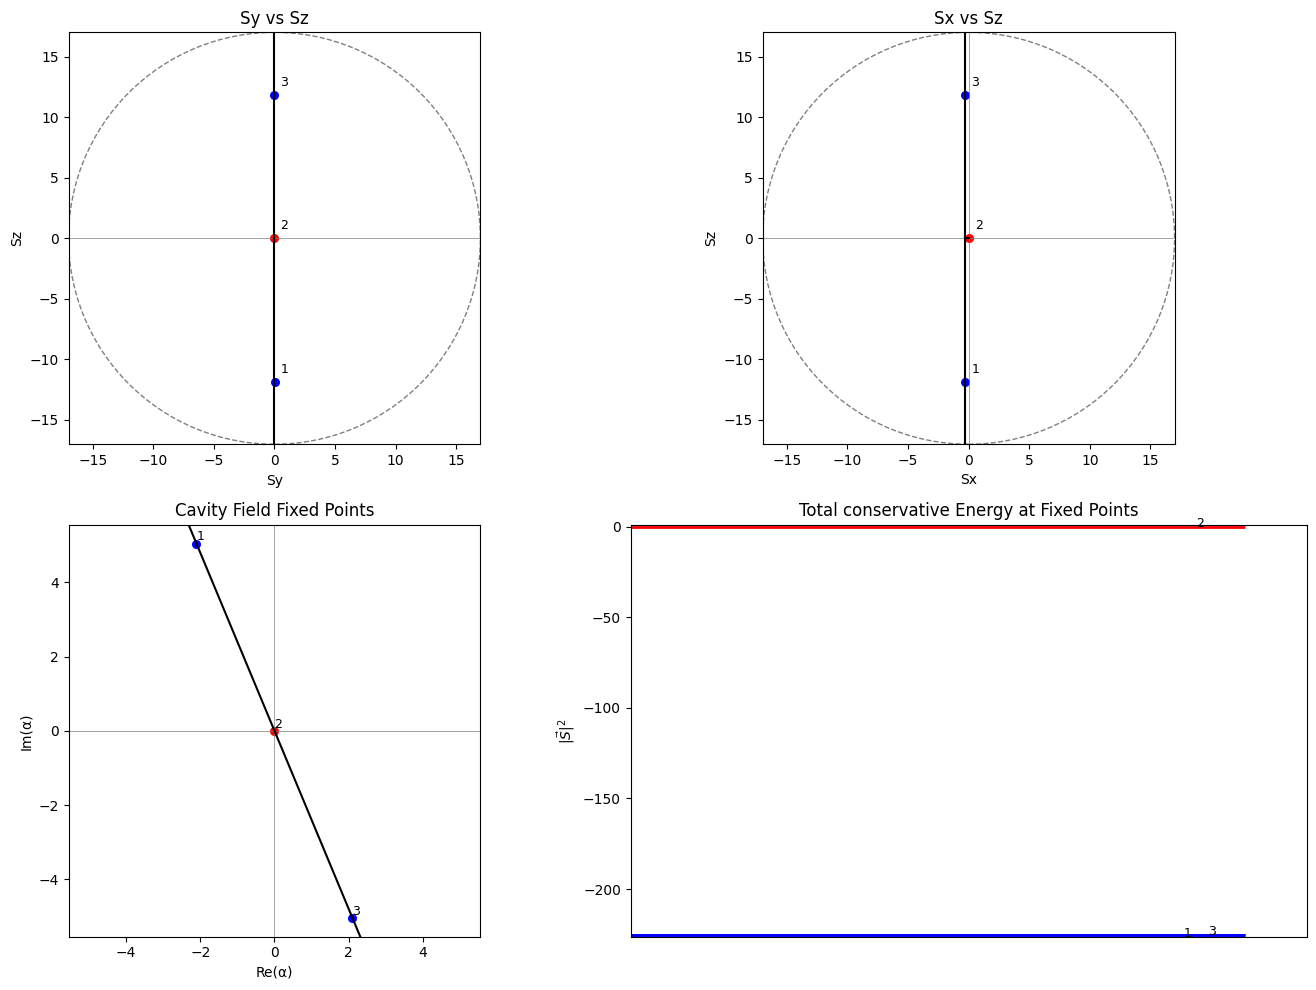

In [11]:
import numpy as np
from scipy.optimize import root
from scipy.linalg import eigvals
import itertools
import matplotlib.pyplot as plt


####################### Pump strength ########################
# effective coupling g_eff = Omega_Rabi * g / (3 * Delta)

# g_eff = 2 * np.pi * 0.07  # below textbook Dicke phase transition    
# g_eff = 2 * np.pi * 0.08  # slightly above textbook Dicke phase transition    
# g_eff = 2 * np.pi * 0.12  # above textbook Dicke phase transition , below first order phase transition
# g_eff = 2 * np.pi * 0.178  # slightly above first order phase transition      
# g_eff = 2 * np.pi * 0.2  #  above first order phase transition , below second order phase transition
# g_eff = 2 * np.pi * 0.5  # slightly below second order phase transition  
g_eff = 2 * np.pi * 0.6  # above second order phase transition  
    

#########################################################
######################## Atomic decay on/off ########################
# Atomic decay parameters
Gamma = 2*np.pi*6.0        # 5P decay rate
# Gamma = 0       # turn off atomic decay for this simulation
#####################################################################

# Parameters (in MHz and us)
delta = -2 * np.pi * 1.2      # detuning
kappa = 2 * np.pi * 1.0       # cavity decay rate
omega_L = 2 * np.pi * 0.14     # Larmor frequency
N_spin = 34                   # number of spin-1/2 particles
Delta = -2 * np.pi * 50.0      # detuning from probe laser to atomic transition
g_max = 2 * np.pi * 3          # maximum coupling strength
Omega_rabi = 3 * Delta * g_eff / (g_max * 2)

A = 4 * delta ** 2 + kappa ** 2

# -------------------------------
# Optical coefficients (dependent on all Sx, Sy, Sz)
# -------------------------------
def gamma_s(ai, ar):
    return (Gamma / (3 * Delta ** 2)) * (Omega_rabi ** 2 + 4 * g_max ** 2 * (ar ** 2 + ai ** 2))

def gamma_p(ai, ar):
    return (Gamma / (18 * Delta ** 2)) * (Omega_rabi ** 2 + 4 * g_max ** 2 * (ar ** 2 + ai ** 2))

def Gamma_op(ai):
    return (2 * Gamma / (9 * Delta ** 2)) * g_max * Omega_rabi * ai

# -------------------------------
# Equations of motion (corrected)
# -------------------------------
def steady_state_eqs(X):
    Sx, Sy, Sz = X
    ar = alpha_r(Sz)
    ai = alpha_i(Sz)
    
    # dalpha_r = -delta * ai - kappa / 2 * ar + g_eff * Sz
    # dalpha_i = delta * ar - kappa / 2 * ai
    dSx = -2 * g_eff * ai * Sy - gamma_s(ai, ar) * Sx
    dSy = 2 * g_eff * ai * Sx - omega_L * Sz - gamma_s(ai, ar) * Sy
    dSz = omega_L * Sy + (N_spin / 2) * Gamma_op(ai) - gamma_p(ai, ar) * Sz

    return [dSx, dSy, dSz]

# -------------------------------
# Optical coefficients (in terms of Sz)
# -------------------------------
def alpha_r(Sz):
    return (2 * g_eff * kappa * Sz) / A

def alpha_i(Sz):
    return (4 * delta * g_eff * Sz) / A

# -------------------------------
# Root finding (now only 3D search)
# -------------------------------
def find_all_fixed_points(grid_pts=21, tol=1e-6):
    guesses = np.linspace(-N_spin / 2, N_spin / 2, grid_pts)
    all_solutions = []

    for guess in itertools.product(guesses, repeat=3):  # now we have 3 variables
        sol = root(steady_state_eqs, guess, method='hybr')
        if sol.success:
            point = np.round(sol.x, decimals=6)
            if not any(np.allclose(point, p, atol=tol) for p in all_solutions):
                if np.linalg.norm(point) <= N_spin / 2:  # ensure within the sphere
                    all_solutions.append(point)

    return all_solutions


# -------------------------------
# Jacobian calculation (in 5D)
# -------------------------------
def stability_analysis(X):
    Sx, Sy, Sz = X
    ar = alpha_r(Sz)
    ai = alpha_i(Sz)
    
    

    dgamma_s_dar = (Gamma / (3 * Delta**2)) * 8 * g_max**2 * ar 
    dgamma_s_dai = (Gamma / (3 * Delta**2)) * 8 * g_max**2 * ai 
    dgamma_p_dar = (Gamma / (18 * Delta**2)) * 8 * g_max**2 * ar
    dgamma_p_dai = (Gamma / (18 * Delta**2)) * 8 * g_max**2 * ai
    dGamma_op_dai = (2 * Gamma / (9 * Delta**2)) * g_max * Omega_rabi 
    

    # Calculate the Jacobian matrix based on the correct equations of motion
    J = np.zeros((5, 5))  # now we have 5 variables to consider

    # dalpha_r/dt
    J[0, 0] = -kappa / 2
    J[0, 1] = -delta  # derivative w.r.t. ai
    J[0, 2] = 0  # derivative w.r.t. Sx
    J[0, 3] = 0  # derivative w.r.t. Sy
    J[0, 4] = g_eff  # derivative w.r.t. Sz

    # dalpha_i/dt
    J[1, 0] = delta  # derivative w.r.t. Sx
    J[1, 1] = -kappa / 2
    J[1, 2] =  0
    J[1, 3] = 0  
    J[1, 4] = 0

    # dSx/dt
    J[2, 0] = -Sx * dgamma_s_dar 
    J[2, 1] = -2 * g_eff * Sy  -Sx * dgamma_s_dai 
    J[2, 2] = - gamma_s(ai, ar) # derivative w.r.t. Sx
    J[2, 3] = -2 * g_eff * ai  # derivative w.r.t. Sy
    J[2, 4] = 0

    # dSy/dt
    J[3, 0] = -Sy * dgamma_s_dar 
    J[3, 1] = 2 * g_eff * Sx -Sy * dgamma_s_dai 
    J[3, 2] = 2 * g_eff * ai  # derivative w.r.t. Sx
    J[3, 3] = - gamma_s(ai, ar) # derivative w.r.t. Sy
    J[3, 4] = - omega_L  # derivative w.r.t. Sz

    # dSz/dt
    J[4, 0] = -Sz * dgamma_p_dar 
    J[4, 1] = -Sz * dgamma_p_dai + N_spin / 2 * dGamma_op_dai 
    J[4, 2] = 0
    J[4, 3] = omega_L  # derivative w.r.t. Sy
    J[4, 4] = -gamma_p(ai, ar)  # derivative w.r.t. Sz

    eigs = eigvals(J)
    return eigs

# -------------------------------
# Run everything
# -------------------------------
fixed_points = find_all_fixed_points(grid_pts=19)
fixed_points.sort(key=lambda pt: pt[2])  # Sort by Sz
print(f"Found {len(fixed_points)} unique fixed points.\n")

for i, pt in enumerate(fixed_points, 1):
    eigs = stability_analysis(pt)
    status = classify_stability(eigs)
    print(f"Fixed point {i}: Sx = {pt[0]:.4f}, Sy = {pt[1]:.4f}, Sz = {pt[2]:.4f} --> {status}")
    print(f"  Eigenvalues: {np.round(eigs, 4)}\n")



fixed_points_info = []
for pt in fixed_points:
    eigs = stability_analysis(pt)
    status = classify_stability(eigs)
    # energy = np.linalg.norm(pt)**2  # total spin "energy" (for visualization)
    fixed_points_info.append({
        "coords": pt,
        "eigvals": eigs,
        "status": status,
        # "energy": energy
    })

# Color mapping
color_map = {"Stable": "blue", "Unstable": "red", "Marginal": "green"}

# Recompute all quantities including correct energy
Sxs = []
Sys = []
Szs = []
alphas_r = []
alphas_i = []
energies = []
colors = []
labels = []

for i, fp in enumerate(fixed_points_info):
    Sx, Sy, Sz = fp["coords"]
    ar = alpha_r(Sz)
    ai = alpha_i(Sz)

    E_spin = energy_spin(Sx, Sy, Sz)
    E_cav = energy_cavity(ar, ai)
    E_int = energy_interaction(Sx, Sy, Sz, ar, ai)
    total_energy = E_spin + E_cav + E_int

    Sxs.append(Sx)
    Sys.append(Sy)
    Szs.append(Sz)
    alphas_r.append(ar)
    alphas_i.append(ai)
    energies.append(total_energy)
    colors.append(color_map[fp["status"]])
    labels.append(f"{i+1}")

# Plotting


plotzoom = 1
fig = plt.figure(figsize=(14, 10))
# -------------------------------
# Top left: 2D Sy vs Sz plot
# -------------------------------
ax1 = fig.add_subplot(2, 2, 1)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
circle = plt.Circle((0, 0), N_spin/2, color='gray', fill=False, linestyle='--')
ax1.add_patch(circle)
ax1.set_xlim(-N_spin/2/plotzoom, N_spin/2/plotzoom)
ax1.set_ylim(-N_spin/2/plotzoom, N_spin/2/plotzoom)
ax1.set_aspect('equal')
ax1.set_title("Sy vs Sz")
ax1.set_xlabel("Sy")
ax1.set_ylabel("Sz")
ax1.plot(np.zeros(21), np.linspace(-N_spin/2,N_spin/2,21), '-', color='k')  # plot for the steady state line of Gamma = 0

for i, (Sy, Sz, c, label) in enumerate(zip(Sys, Szs, colors, labels)):
    ax1.scatter(Sy, Sz, color=c, s=30)
    offset = 0.5  # distance away from point
    point_offset = 0
    if (Sy**2 +Sz**2)<1: point_offset = 1.5
    ax1.text(Sy*(1+point_offset) + offset , Sz*(1+point_offset) + offset, f"{label}", fontsize=9, ha='left', va='bottom')


# -------------------------------
# Top right: 2D Sx vs Sz plot
# -------------------------------
ax2 = fig.add_subplot(2, 2, 2)
ax2.axhline(0, color='gray', lw=0.5)
ax2.axvline(0, color='gray', lw=0.5)
circle = plt.Circle((0, 0), N_spin/2, color='gray', fill=False, linestyle='--')
ax2.add_patch(circle)
ax2.set_xlim(-N_spin/2/plotzoom, N_spin/2/plotzoom)
ax2.set_ylim(-N_spin/2/plotzoom, N_spin/2/plotzoom)
ax2.set_aspect('equal')
ax2.set_title("Sx vs Sz")
ax2.set_xlabel("Sx")
ax2.set_ylabel("Sz")
ax2.plot((omega_L *A) / (8 * delta * g_eff**2 )* np.ones(21), np.linspace(-N_spin/2,N_spin/2,21), '-', color='k')  # plot for the steady state line of Gamma = 0

ax2.plot(np.linspace((omega_L *A) / (8 * delta * g_eff**2 ),0,21), np.zeros(21), '-', color='k')  # plot for the steady state line of Gamma = 0

for i, (Sx, Sz, c, label) in enumerate(zip(Sxs, Szs, colors, labels)):
    ax2.scatter(Sx, Sz, color=c, s=30)
    offset = 0.5  # distance away from point
    point_offset = 0
    if (Sx**2 +Sz**2)<0.5: point_offset = 0.5
    ax2.text(Sx*(1+point_offset) + offset , Sz*(1+point_offset) + offset, f"{label}", fontsize=9, ha='left', va='bottom')


# # -------------------------------
# # Top right: 3D plot of (Sx, Sy, Sz) with outer sphere
# # -------------------------------
# ax2 = fig.add_subplot(2, 2, 2, projection='3d')
# u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
# x = (N_spin/2) * np.cos(u)*np.sin(v)
# y = (N_spin/2) * np.sin(u)*np.sin(v)
# z = (N_spin/2) * np.cos(v)
# ax2.plot_surface(x, y, z, color='gray', alpha=0.05, edgecolor='none')

# for i, (Sx, Sy, Sz, c, label) in enumerate(zip(Sxs, Sys, Szs, colors, labels)):
#     ax2.scatter(Sy, Sz, Sx, color=c, s=30)
#     offset = 0.5  # distance away from point
#     point_offset = 0
#     if (Sy**2 +Sz**2)<1: point_offset = 1.5
#     ax2.text(Sy*(1+point_offset)+offset, Sz*(1+point_offset)+offset, Sx*(1+point_offset)+offset, f"{label}", fontsize=9)

# ax2.set_title("3D Spin Vector")
# ax2.set_xlabel("Sy")
# ax2.set_ylabel("Sz")
# ax2.set_zlabel("Sx")
# ax2.set_xlim(-N_spin/2, N_spin/2)
# ax2.set_ylim(-N_spin/2, N_spin/2)
# ax2.set_zlim(-N_spin/2, N_spin/2)
# ax2.set_box_aspect([1, 1, 1])
# ax2.view_init(elev=20, azim=45)

# -------------------------------
# Bottom left: cavity field plot (alpha_r vs alpha_i)
# -------------------------------
ax3 = fig.add_subplot(2, 2, 3)
ax3.axhline(0, color='gray', lw=0.5)
ax3.axvline(0, color='gray', lw=0.5)
ax3.set_title("Cavity Field Fixed Points")
ax3.set_xlabel("Re(α)")
ax3.set_ylabel("Im(α)")
alpha_abs_max = max(np.max(np.abs(alphas_r)), np.max(np.abs(alphas_i)))
lim = 1.1 * alpha_abs_max
ax3.set_xlim(-lim/plotzoom, lim/plotzoom)
ax3.set_ylim(-lim/plotzoom, lim/plotzoom)
ax3.set_aspect('equal')
ax3.plot(kappa/np.sqrt(A)*np.linspace(-N_spin/2,N_spin/2,21), 2*delta/np.sqrt(A)*np.linspace(-N_spin/2,N_spin/2,21), '-', color='k')  # plot for the steady state line of Gamma = 0

for i, (ar, ai, c, label) in enumerate(zip(alphas_r, alphas_i, colors, labels)):
    ax3.scatter(ar, ai, color=c, s=30)
    offset = 0.002  # distance away from point
    point_offset = 0
    if (ar**2 +ai**2)<0.2: point_offset = 0.00001
    ax3.text(ar*(1+point_offset) + offset, ai*(1+point_offset) + offset, f"{label}", fontsize=9, ha='left', va='bottom')

# -------------------------------
# Bottom right: energy plot
# -------------------------------
ax4 = fig.add_subplot(2, 2, 4)
for i, (e, c, label) in enumerate(zip(energies, colors, labels)):
    ax4.hlines(e, xmin=0, xmax=1, color=c, lw=2)
    ax4.text(0.9+0.02*i, e+0.5*(i+2), f"{label}", va='center', fontsize=9)

ax4.set_xlim(0, 1.1)
ax4.set_ylim(min(energies)-1, max(energies)+1)
ax4.set_xticks([])
ax4.set_title("Total conservative Energy at Fixed Points")
ax4.set_ylabel(r"$|\vec{S}|^2$")

plt.tight_layout()
plt.show()

## time evolution analysis

### code to show realtime evolution

As we expect, when $\delta<0$, cavity cooling takes energy away from the collective spin (and vice versa). 

One can modify Gamma to turn individual atomic incoherent scattering on or off. Or simply plug in values from the above fixed point values.


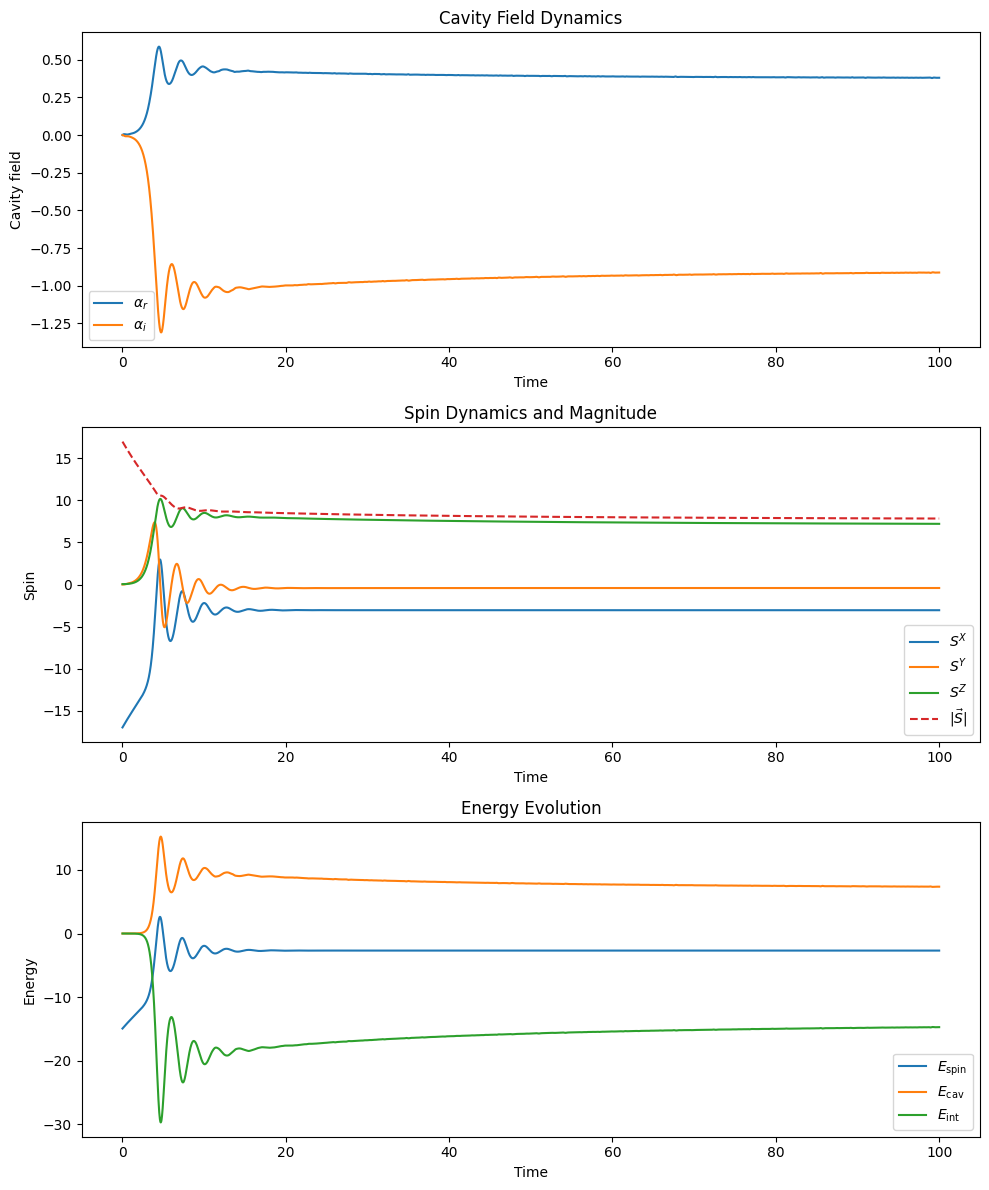

In [42]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt




####################### Pump strength ########################
# effective coupling g_eff = Omega_Rabi * g / (3 * Delta)

# g_eff = 2 * np.pi * 0.07  # below textbook Dicke phase transition    
# g_eff = 2 * np.pi * 0.08  # slightly above textbook Dicke phase transition    
# g_eff = 2 * np.pi * 0.12  # above textbook Dicke phase transition , below first order phase transition
g_eff = 2 * np.pi * 0.178  # slightly above first order phase transition      
# g_eff = 2 * np.pi * 0.2  #  above first order phase transition , below second order phase transition
# g_eff = 2 * np.pi * 0.5  # slightly below second order phase transition  
# g_eff = 2 * np.pi * 0.6  # above second order phase transition  
#########################################################
# ######################## Atomic decay on/off ########################
# # Atomic decay parameters
Gamma = 2*np.pi*6.0       # 5P decay rate
# Gamma = 0       # turn off atomic decay for this simulation
# #####################################################################



# Parameters (in MHz and us)
delta = -2*np.pi*1.2       # detuning
kappa = 2*np.pi*1.0       # cavity decay rate
omega_L = 2*np.pi*0.14     # Larmor frequency
# g_eff = 2*np.pi*1.0     # effective coupling = Omega_Rabi*g / (3*Delta)
# g_eff = 2*np.pi*0.3    # effective coupling = Omega_Rabi*g / (3*Delta)
N_spin = 34                  # number of spin-1/2 particles

Delta = -2*np.pi*50.0  # detuning from probe laser to atomic transition
g_max = 2*np.pi*3  # maximum coupling strength
Omega_rabi = 3*Delta*g_eff / (g_max*2)






# Define the system of ODEs
def dynamics(t, y):
    alpha_r, alpha_i, Sx, Sy, Sz = y
    gamma_p = (Gamma / (18 * Delta**2)) * (Omega_rabi**2 + 4 * g_max**2 * (alpha_i**2+alpha_r**2))
    gamma_s = 6 * gamma_p
    Gamma_op = (2 * Gamma / (9 * Delta**2)) * g_max * Omega_rabi * alpha_i 

    dalpha_r_dt = -delta * alpha_i - (kappa / 2) * alpha_r  + g_eff * Sz    
    dalpha_i_dt = delta * alpha_r - (kappa / 2) * alpha_i
    dSx_dt = -2 * g_eff * alpha_i * Sy - gamma_s * Sx
    dSy_dt = +2 * g_eff * alpha_i * Sx - omega_L * Sz - gamma_s * Sy
    dSz_dt = omega_L * Sy + Gamma_op * (N_spin/2) - gamma_p * Sz

    return [dalpha_r_dt, dalpha_i_dt, dSx_dt, dSy_dt, dSz_dt]

# Initial conditions
alpha_r0 = 0.0
alpha_i0 = 0.0
Sx0 =-N_spin/2
Sy0 = 0.0
Sz0 = 0.05  # e.g., spin initially up

y0 = [alpha_r0, alpha_i0, Sx0, Sy0, Sz0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 5000)

# Solve ODE
sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval, method='RK45')
t = sol.t
alpha_r, alpha_i, Sx, Sy, Sz = sol.y

# Derived quantities
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

# Energies
E_spin = omega_L * Sx
E_cav = -delta * (alpha_r**2 + alpha_i**2)
E_int = 2 * g_eff * Sz * alpha_i  # factor 2 comes from alpha + alpha^*

# Plotting
plt.figure(figsize=(10, 12))

# 1. Cavity field components
plt.subplot(3, 1, 1)
plt.plot(t, alpha_r, label=r'$\alpha_r$')
plt.plot(t, alpha_i, label=r'$\alpha_i$')
plt.xlabel('Time')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# 2. Spin components and magnitude
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^X$')
plt.plot(t, Sy, label=r'$S^Y$')
plt.plot(t, Sz, label=r'$S^Z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time')
plt.ylabel('Spin')
plt.title('Spin Dynamics and Magnitude')
plt.legend()

# 3. Energy components
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_\mathrm{spin}$')
plt.plot(t, E_cav, label=r'$E_\mathrm{cav}$')
plt.plot(t, E_int, label=r'$E_\mathrm{int}$')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Evolution')
plt.legend()

plt.tight_layout()
plt.show()

### code to show emsemble average behavior

Many trajectories with the initial condition of a vacuum cavity field, and a random collective spin (either "full random" or "random OP"). 

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection


###################### initial spin state ########################
# spin_init = "full random"   # evenly distributed in the bulk of the spin sphere
spin_init = "random OP"  # evenly distributed on the surface of the spin sphere
####################### Pump strength ########################
# effective coupling g_eff = Omega_Rabi * g / (3 * Delta)

# g_eff = 2 * np.pi * 0.07  # below textbook Dicke phase transition    
# g_eff = 2 * np.pi * 0.08  # slightly above textbook Dicke phase transition    
# g_eff = 2 * np.pi * 0.12  # above textbook Dicke phase transition , below first order phase transition
# g_eff = 2 * np.pi * 0.178  # slightly above first order phase transition      
g_eff = 2 * np.pi * 0.2  #  above first order phase transition , below second order phase transition
# g_eff = 2 * np.pi * 0.5  # slightly below second order phase transition  
# g_eff = 2 * np.pi * 0.6  # above second order phase transition  
#########################################################
# ######################## Atomic decay on/off ########################
# # Atomic decay parameters
Gamma = 2*np.pi*6.0       # 5P decay rate
# Gamma = 0       # turn off atomic decay for this simulation
# #####################################################################



# Parameters (in MHz and us)
delta = -2*np.pi*1.2       # detuning
kappa = 2*np.pi*1.0       # cavity decay rate
omega_L = 2*np.pi*0.14     # Larmor frequency
# g_eff = 2*np.pi*1.0     # effective coupling = Omega_Rabi*g / (3*Delta)
# g_eff = 2*np.pi*0.3    # effective coupling = Omega_Rabi*g / (3*Delta)
N_spin = 34                  # number of spin-1/2 particles

Delta = -2*np.pi*50.0  # detuning from probe laser to atomic transition
g_max = 2*np.pi*3  # maximum coupling strength
Omega_rabi = 3*Delta*g_eff / (g_max*2)





S0_mag = N_spin / 2
n_trajectories = 100

# Time grid
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)
n_time = len(t_eval)



# Define the system of ODEs
def dynamics(t, y):
    alpha_r, alpha_i, Sx, Sy, Sz = y
    gamma_p = (Gamma / (18 * Delta**2)) * (Omega_rabi**2 + 4 * g_max**2 * (alpha_i**2+alpha_r**2))
    gamma_s = 6 * gamma_p
    Gamma_op = (2 * Gamma / (9 * Delta**2)) * g_max * Omega_rabi * alpha_i

    dalpha_r_dt = -delta * alpha_i - (kappa / 2) * alpha_r  + g_eff * Sz    
    dalpha_i_dt = delta * alpha_r - (kappa / 2) * alpha_i
    dSx_dt = -2 * g_eff * alpha_i * Sy - gamma_s * Sx
    dSy_dt = 2 * g_eff * alpha_i * Sx - omega_L * Sz - gamma_s * Sy
    dSz_dt = omega_L * Sy + Gamma_op * (N_spin/2) - gamma_p * Sz
    

    return [dalpha_r_dt, dalpha_i_dt, dSx_dt, dSy_dt, dSz_dt]



# Storage
results = []

for i in range(n_trajectories):
    rng = np.random.default_rng(seed=i)
    theta = np.arccos(2 * rng.random() - 1)
    phi = 2 * np.pi * rng.random()
    if spin_init == "full random":
        shrink_factor = rng.random()  # shrink factor for random distribution
        Sx0 = S0_mag * np.sin(theta) * np.cos(phi) * shrink_factor
        Sy0 = S0_mag * np.sin(theta) * np.sin(phi) * shrink_factor
        Sz0 = S0_mag * np.cos(theta) * shrink_factor
    elif spin_init == "random OP":
        Sx0 = S0_mag * np.sin(theta) * np.cos(phi)
        Sy0 = S0_mag * np.sin(theta) * np.sin(phi)
        Sz0 = S0_mag * np.cos(theta)
    y0 = [0.0, 0.0, Sx0, Sy0, Sz0]

    sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval, method='RK45'
                ,rtol=1e-5,            # tighten relative tolerance
                atol=1e-7,           # tighten absolute tolerance
                max_step=0.01        # maximum step size in time units
                )
    alpha_r, alpha_i, Sx, Sy, Sz = sol.y
    S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)
    E_spin = omega_L * Sx
    E_cav = -delta * (alpha_r**2 + alpha_i**2)
    E_int = 2 * g_eff * Sz * alpha_i

    results.append({
        't': sol.t, 'alpha_r': alpha_r, 'alpha_i': alpha_i,
        'Sx': Sx, 'Sy': Sy, 'Sz': Sz, 'S_mag': S_mag,
        'E_spin': E_spin, 'E_cav': E_cav, 'E_int': E_int
    })



C:\Users\luyue\AppData\Local\Temp\ipykernel_32052\1967465259.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


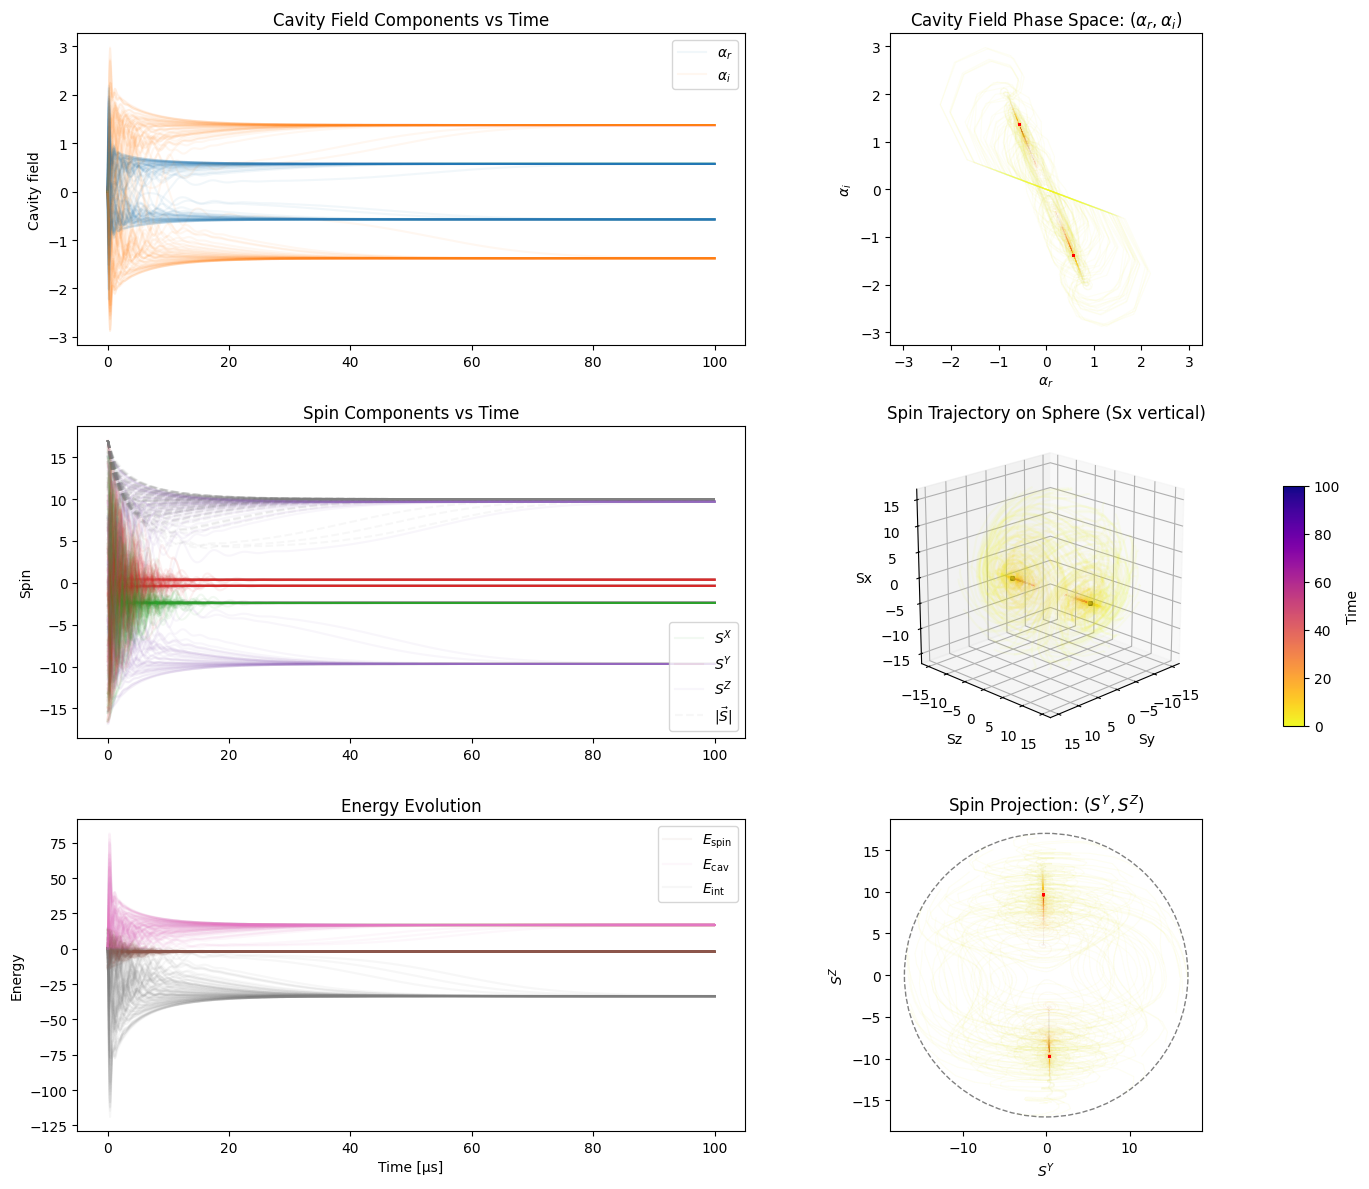

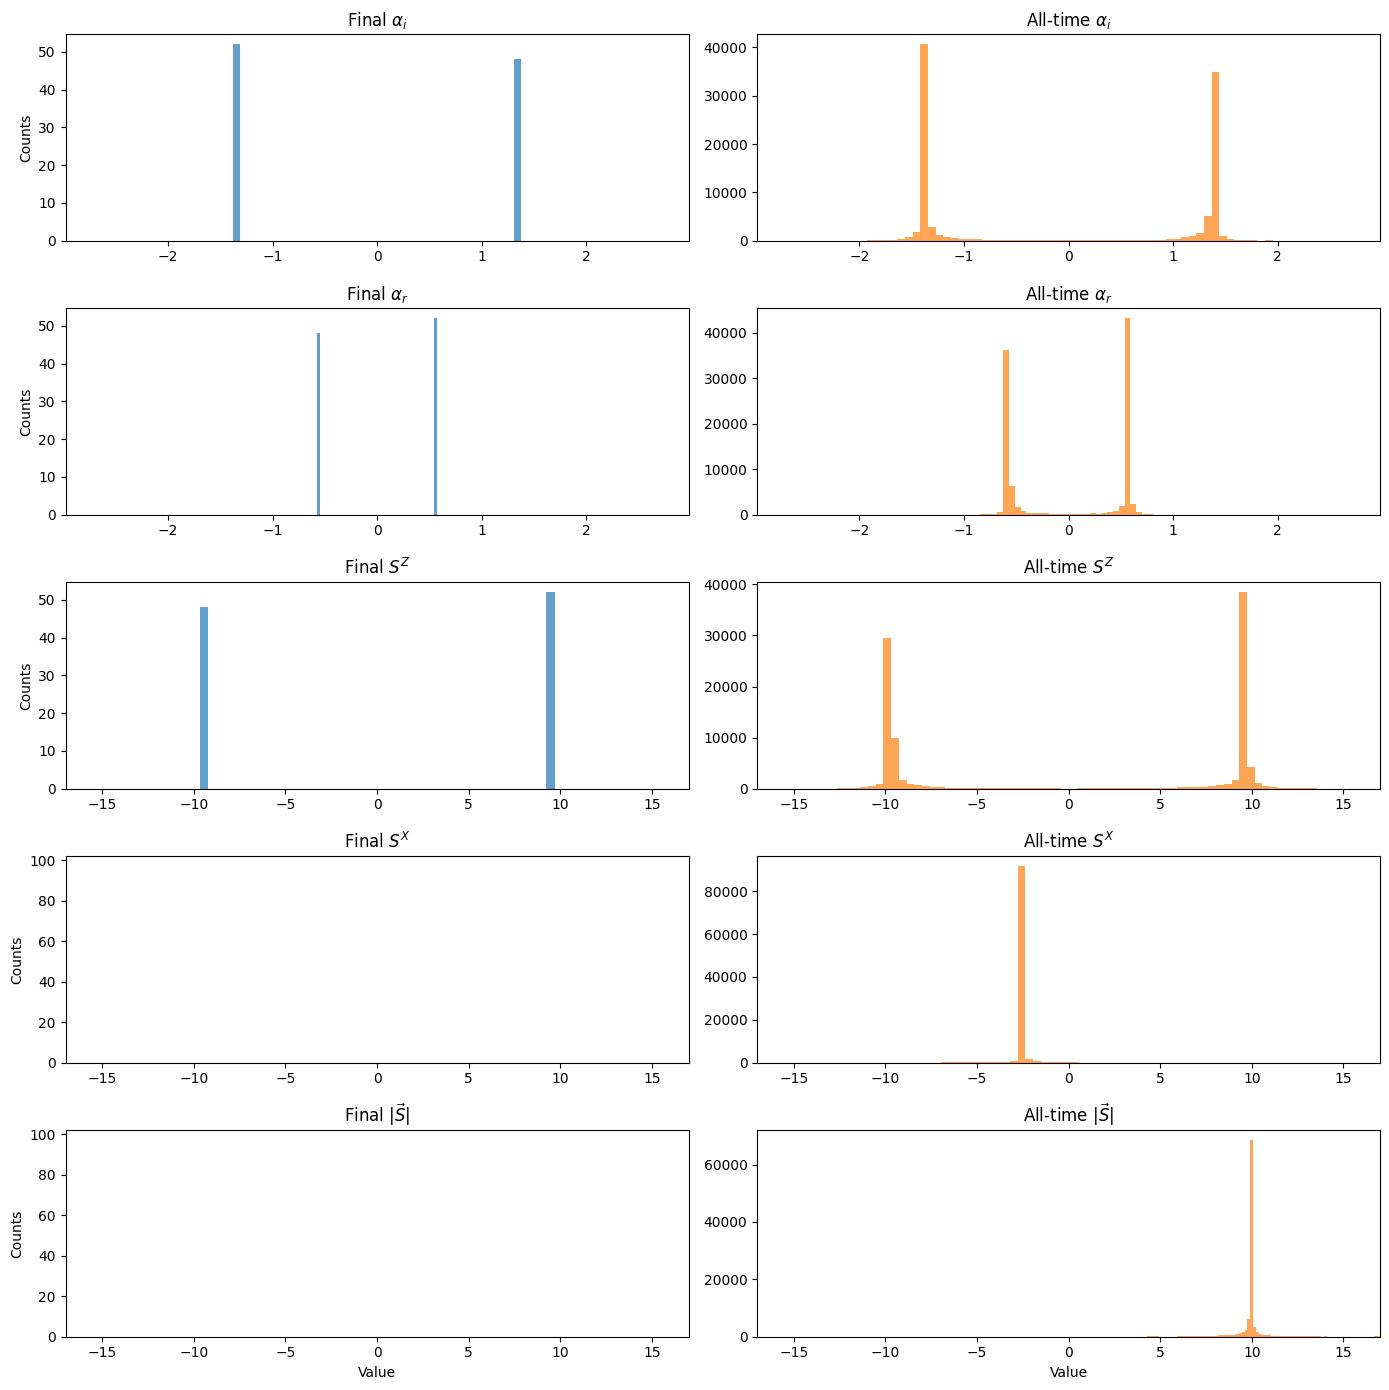

In [13]:


alpha_plot = 0.06

# Setup figure: 3x2 layout
fig = plt.figure(figsize=(14, 12))

# Row 1: Time plots (cavity field)
ax1 = plt.subplot(3, 2, 1)
for res in results:
    t = res['t']
    ax1.plot(t, res['alpha_r'], color='C0', alpha=alpha_plot)
    ax1.plot(t, res['alpha_i'], color='C1', alpha=alpha_plot)
ax1.set_title('Cavity Field Components vs Time')
ax1.set_ylabel('Cavity field')
ax1.legend([r'$\alpha_r$', r'$\alpha_i$'])

# Row 2: Spin dynamics
ax2 = plt.subplot(3, 2, 3)
for res in results:
    t = res['t']
    ax2.plot(t, res['Sx'], color='C2', alpha=alpha_plot)
    ax2.plot(t, res['Sy'], color='C3', alpha=alpha_plot)
    ax2.plot(t, res['Sz'], color='C4', alpha=alpha_plot)
    ax2.plot(t, res['S_mag'], '--', color='gray', alpha=alpha_plot)
ax2.set_title('Spin Components vs Time')
ax2.set_ylabel('Spin')
ax2.legend([r'$S^X$', r'$S^Y$', r'$S^Z$', r'$|\vec{S}|$'])

# Row 3: Energy
ax3 = plt.subplot(3, 2, 5)
for res in results:
    t = res['t']
    ax3.plot(t, res['E_spin'], color='C5', alpha=alpha_plot)
    ax3.plot(t, res['E_cav'], color='C6', alpha=alpha_plot)
    ax3.plot(t, res['E_int'], color='C7', alpha=alpha_plot)
ax3.set_title('Energy Evolution')
ax3.set_xlabel('Time [µs]')
ax3.set_ylabel('Energy')
ax3.legend([r'$E_\mathrm{spin}$', r'$E_\mathrm{cav}$', r'$E_\mathrm{int}$'])


# Right column row 1: Cavity phase space (2D) with LineCollection
ax4 = plt.subplot(3, 2, 2)
norm = plt.Normalize(0, t_eval[-1])
for res in results:
    x = res['alpha_r']
    y = res['alpha_i']
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cm.plasma_r, norm=norm, alpha=alpha_plot, linewidth=0.75)
    lc.set_array(res['t'])
    ax4.add_collection(lc)
    ax4.scatter(x[-1], y[-1], color='red', s=1, zorder=3)  # 's' is the size of the point
    # ax4.plot(x[-1], y[-1], 'o', color='black', markersize=3)

# Compute limits from actual cavity field data
alpha_r_all = np.concatenate([res['alpha_r'] for res in results])
alpha_i_all = np.concatenate([res['alpha_i'] for res in results])
alpha_abs_max = max(np.max(np.abs(alpha_r_all)), np.max(np.abs(alpha_i_all)))
lim = 1.1 * alpha_abs_max
ax4.set_xlim(-lim, lim)
ax4.set_ylim(-lim, lim)
ax4.set_aspect('equal', adjustable='box')
ax4.set_title(r'Cavity Field Phase Space: $(\alpha_r, \alpha_i)$')
ax4.set_xlabel(r'$\alpha_r$')
ax4.set_ylabel(r'$\alpha_i$')


# Right column row 2: 3D Spin trajectory (Sx is vertical, with colorbar)
ax5 = fig.add_subplot(3, 2, 4, projection='3d')
norm = plt.Normalize(0, t_eval[-1])
sm = cm.ScalarMappable(cmap=cm.plasma_r, norm=norm)
sm.set_array([])  # For colorbar

for res in results:
    # Swap axes: z = Sx to make Sx vertical
    x, y, z = res['Sy'], res['Sz'], res['Sx']
    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = Line3DCollection(segments, cmap=cm.plasma_r, norm=norm, alpha=alpha_plot)
    lc.set_array(res['t'])
    ax5.add_collection3d(lc)
    ax5.scatter(x[-1], y[-1], z[-1], color='black', s=5)

# Axis limits
ax5.set_xlim([-S0_mag, S0_mag])
ax5.set_ylim([-S0_mag, S0_mag])
ax5.set_zlim([-S0_mag, S0_mag])
ax5.set_box_aspect([1, 1, 1])

# Labels adjusted for swapped axes
ax5.set_xlabel('Sy')
ax5.set_ylabel('Sz')
ax5.set_zlabel('Sx')  # Sx is vertical

ax5.view_init(elev=20, azim=45)

# Title and colorbar
ax5.set_title('Spin Trajectory on Sphere (Sx vertical)')

# Add colorbar for time
cbar_ax = fig.add_axes([0.92, 0.39, 0.015, 0.2])  # [left, bottom, width, height]
fig.colorbar(sm, cax=cbar_ax, label='Time')

# Right column row 3: 2D Spin projection (Sy, Sz) with LineCollection
ax6 = plt.subplot(3, 2, 6)
for res in results:
    x = res['Sy']
    y = res['Sz']
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cm.plasma_r, norm=norm, alpha=alpha_plot, linewidth=0.75)
    lc.set_array(res['t'])
    ax6.add_collection(lc)
    # Adding a small non-transparent red point to the end of each trajectory
    ax6.scatter(x[-1], y[-1], color='red', s=1, zorder=3)  # 's' is the size of the point

    # ax6.plot(x[-1], y[-1], 'o', color='black', markersize=3)

ax6.set_title('Spin Projection: $(S^Y, S^Z)$')
ax6.set_xlabel(r'$S^Y$')
ax6.set_ylabel(r'$S^Z$')
ax6.set_xlim([-1.1 * S0_mag, 1.1 * S0_mag])
ax6.set_ylim([-1.1 * S0_mag, 1.1 * S0_mag])
ax6.set_aspect('equal', adjustable='box')
circle = plt.Circle((0, 0), S0_mag, color='gray', fill=False, linestyle='--')
ax6.add_patch(circle)

plt.tight_layout()
plt.show()

################################################################################################################################
# Extract final and all-time values
alpha_i_final = [res['alpha_i'][-1] for res in results]
alpha_r_final = [res['alpha_r'][-1] for res in results]
Sz_final = [res['Sz'][-1] for res in results]
Sx_final = [res['Sx'][-1] for res in results]
Smag_final = [res['S_mag'][-1] for res in results]

alpha_i_all = np.concatenate([res['alpha_i'] for res in results])
alpha_r_all = np.concatenate([res['alpha_r'] for res in results])
Sz_all = np.concatenate([res['Sz'] for res in results])
Sx_all = np.concatenate([res['Sx'] for res in results])
Smag_all = np.concatenate([res['S_mag'] for res in results])

# Set common limits
alpha_lim = max(np.max(np.abs(alpha_i_all)), np.max(np.abs(alpha_r_all)))
S_lim = np.max([np.max(res['S_mag']) for res in results])

# Prepare labels and data
variables = [
    (alpha_i_final, alpha_i_all, r'$\alpha_i$', alpha_lim),
    (alpha_r_final, alpha_r_all, r'$\alpha_r$', alpha_lim),
    (Sz_final, Sz_all, r'$S^Z$', S_lim),
    (Sx_final, Sx_all, r'$S^X$', S_lim),
    (Smag_final, Smag_all, r'$|\vec{S}|$', S_lim),
]

# Plot 2-column x 5-row layout
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 14))
for i, (final, all_vals, label, lim) in enumerate(variables):
    # Left: final values
    axs[i, 0].hist(final, bins=40, color='C0', alpha=0.7)
    axs[i, 0].set_title(f'Final {label}')
    axs[i, 0].set_xlim(-lim, lim)

    # Right: all-time values
    axs[i, 1].hist(all_vals, bins=80, color='C1', alpha=0.7)
    axs[i, 1].set_title(f'All-time {label}')
    axs[i, 1].set_xlim(-lim, lim)

for ax in axs[-1, :]:
    ax.set_xlabel('Value')
for ax in axs[:, 0]:
    ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

# Full quantum model

---
## quantum spins in a quantum cavity (intermediate regime)

Fully quantum. 

---

We write the Master equation in the form:

<!-- 
$$
\begin{aligned}
\frac{d\rho}{dt} =\; & -i \left[-\delta  a_x^\dagger a_x + \sum_n \left( \omega_L s_n^x  +g_\text{eff} s_n^z (i a_x^\dagger -i a_x)  \right), \rho \right]
+ \kappa \left( a \rho a^\dagger - \tfrac{1}{2} \left\{ a^\dagger a,\; \rho \right\} \right) \\
& + \sum_n \Bigg[ 
L_{n}^{\uparrow \leftarrow \downarrow} \rho {L_{n}^{\uparrow \leftarrow \downarrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\uparrow \leftarrow \downarrow}}^\dagger L_{n}^{\uparrow \leftarrow \downarrow}, \rho \right\} 
 \quad + \quad
L_{n}^{\downarrow \leftarrow \uparrow} \rho {L_{n}^{\downarrow \leftarrow \uparrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\downarrow \leftarrow \uparrow}}^\dagger L_{n}^{\downarrow \leftarrow \uparrow}, \rho \right\} \\
& \qquad\quad + 
L_{n}^{\uparrow \leftarrow \uparrow} \rho {L_{n}^{\uparrow \leftarrow \uparrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\uparrow \leftarrow \uparrow}}^\dagger L_{n}^{\uparrow \leftarrow \uparrow}, \rho \right\} 
  \quad + \quad
L_{n}^{\downarrow \leftarrow \downarrow} \rho {L_{n}^{\downarrow \leftarrow \downarrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\downarrow \leftarrow \downarrow}}^\dagger L_{n}^{\downarrow \leftarrow \downarrow}, \rho \right\} 
\Bigg]
\end{aligned}
$$

The four composite jump operators are:

$$
\begin{aligned}
L_{n}^{\uparrow \leftarrow \downarrow} &= \frac{\sqrt{\Gamma}}{3 \sqrt{2} \Delta} \left( \Omega \, \sigma_n^+ + 2 i g \, \sigma_n^+ \otimes a \right), \\
L_{n}^{\downarrow \leftarrow \uparrow} &= \frac{\sqrt{\Gamma}}{3 \sqrt{2} \Delta} \left( \Omega \, \sigma_n^- - 2 i g \, \sigma_n^- \otimes a \right), \\
L_{n}^{\uparrow \leftarrow \uparrow} &= \frac{\sqrt{5\Gamma}}{3 \sqrt{2} \Delta} \left( \Omega \, P_n^\uparrow + \frac{8}{5} i g \, P_n^\uparrow \otimes a \right), \\
L_{n}^{\downarrow \leftarrow \downarrow} &= \frac{\sqrt{5\Gamma}}{3 \sqrt{2} \Delta} \left( \Omega \, P_n^\downarrow - \frac{8}{5} i g \, P_n^\downarrow \otimes a \right).
\end{aligned}
$$ -->


$$
\begin{aligned}
\frac{d\rho}{dt} =\; & -i \left[-\delta  a_x^\dagger a_x + \sum_n \left( \omega_L s_n^x  +g_\text{eff} s_n^z (i a_x^\dagger -i a_x)  \right), \rho \right]
+ \kappa \left( a \rho a^\dagger - \tfrac{1}{2} \left\{ a^\dagger a,\; \rho \right\} \right) \\
& + \sum_n \Bigg[ 
L_{n}^{\uparrow \leftarrow \downarrow} \rho {L_{n}^{\uparrow \leftarrow \downarrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\uparrow \leftarrow \downarrow}}^\dagger L_{n}^{\uparrow \leftarrow \downarrow}, \rho \right\} 
 \quad + \quad
L_{n}^{\downarrow \leftarrow \uparrow} \rho {L_{n}^{\downarrow \leftarrow \uparrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\downarrow \leftarrow \uparrow}}^\dagger L_{n}^{\downarrow \leftarrow \uparrow}, \rho \right\} \\
& \qquad\quad + 
L_{n,1}^{\uparrow \leftarrow \uparrow} \rho {L_{n,1}^{\uparrow \leftarrow \uparrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n,1}^{\uparrow \leftarrow \uparrow}}^\dagger L_{n,1}^{\uparrow \leftarrow \uparrow}, \rho \right\} 
  \quad + \quad
L_{n,1}^{\downarrow \leftarrow \downarrow} \rho {L_{n,1}^{\downarrow \leftarrow \downarrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n,1}^{\downarrow \leftarrow \downarrow}}^\dagger L_{n,1}^{\downarrow \leftarrow \downarrow}, \rho \right\}\\
& \qquad\quad + 
L_{n,2}^{\uparrow \leftarrow \uparrow} \rho {L_{n,2}^{\uparrow \leftarrow \uparrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n,2}^{\uparrow \leftarrow \uparrow}}^\dagger L_{n,2}^{\uparrow \leftarrow \uparrow}, \rho \right\} 
  \quad + \quad
L_{n,2}^{\downarrow \leftarrow \downarrow} \rho {L_{n,2}^{\downarrow \leftarrow \downarrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n,2}^{\downarrow \leftarrow \downarrow}}^\dagger L_{n,2}^{\downarrow \leftarrow \downarrow}, \rho \right\} 
\Bigg]
\end{aligned}
$$

The four composite jump operators are:

$$
\begin{aligned}
L_{n}^{\uparrow \leftarrow \downarrow} &= \frac{\sqrt{\Gamma}}{ 6 \Delta} \left( \Omega \, \sigma_n^+ - 2 i g \, \sigma_n^+ \otimes a \right), \\
L_{n}^{\downarrow \leftarrow \uparrow} &= \frac{\sqrt{\Gamma}}{6 \Delta} \left( \Omega \, \sigma_n^- + 2 i g \, \sigma_n^- \otimes a \right), \\
L_{n,1}^{\uparrow \leftarrow \uparrow} &= \frac{\sqrt{\Gamma}}{2 \sqrt{2} \Delta} \left( \Omega \, P_n^\uparrow - 2 i g \, P_n^\uparrow \otimes a \right), \\
L_{n,2}^{\uparrow \leftarrow \uparrow} &= \frac{\sqrt{\Gamma}}{6 \sqrt{2} \Delta} \left( \Omega \, P_n^\uparrow + 2 i g \, P_n^\uparrow \otimes a \right), \\
L_{n,1}^{\downarrow \leftarrow \downarrow} &= \frac{\sqrt{\Gamma}}{2 \sqrt{2} \Delta} \left( \Omega \, P_n^\downarrow + 2 i g \, P_n^\downarrow \otimes a \right), \\
L_{n,2}^{\downarrow \leftarrow \downarrow} &= \frac{\sqrt{\Gamma}}{6 \sqrt{2} \Delta} \left( \Omega \, P_n^\downarrow - 2 i g \, P_n^\downarrow \otimes a \right).
\end{aligned}
$$

The first line represents coherent evolution (and incoherent cavity dissipation); the second line represents individual spin level optical pump and depumping (the inbalance of the two terms leads to directional optical pumping); the third line represents individual spin level dephasing. $\rho$ is a $2^N \times M$ dimensional tensor, where $M$ is the truncated Fock state basis dimension of the cavity.  

Note:
1. The second third and fourth line operators are composite operators that are multiple (spin jump + cavity decay) that are coherently summed up. 
2. This is an approximation (as discussed in the Hamiltonian and jump operators section)




## code for examplary time evolution trajectory.

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:  87.29s


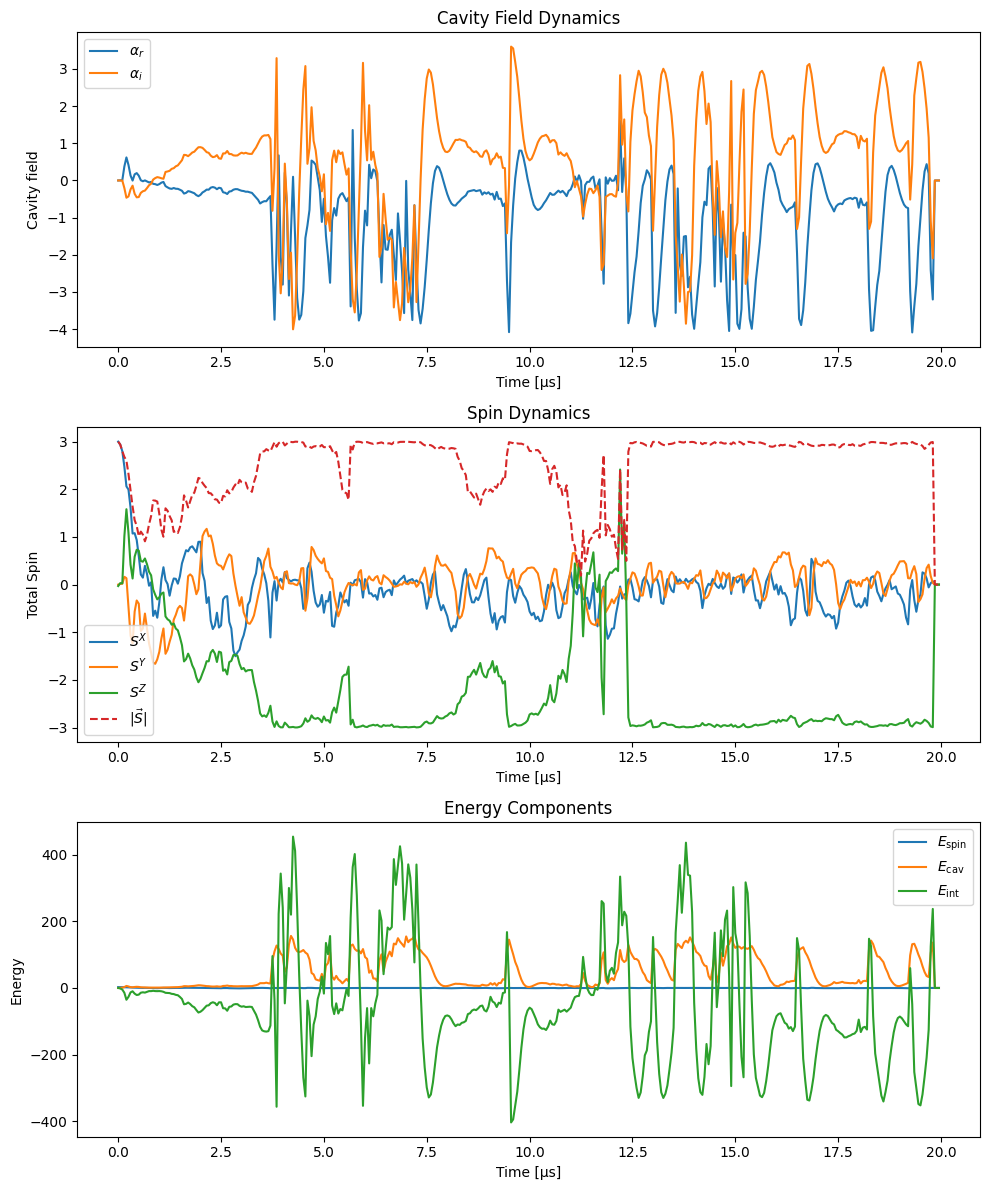

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from qutip import *

# --- Parallel execution and initial condition ---
num_traj = 10
ini_spin = "fixed OP"


pi = np.pi
# --- System parameters ---
delta = -2 * pi * 1.2
kappa = 2 * pi * 1.0 
omega_L = 2 * pi * 0.5
omega_L = 2 * pi * 0.14
Gamma = 2 * pi * 6.0 /10
Delta = -2 * pi * 50.0
g = 2 * pi * 3.0
g_eff = 2 * pi * 0.6
N = 6  # number of spins
Omega = 3 * Delta * g_eff / g/2
 
# --- Time grid ---
t_max = 20
dt = 0.05
tlist = np.arange(0, t_max, dt)

# --- Fock space truncation ---
M = 25

# --- Prefactors ---
A_pref = np.sqrt(Gamma) / (6 * abs(Delta))
B1_pref = np.sqrt(Gamma) / (2 * np.sqrt(2) * abs(Delta))
B2_pref = np.sqrt(Gamma) / (6 * np.sqrt(2) * abs(Delta))
# g1 = 2 * g
# g2 = 2 * g

# --- Elementary operators ---
sm = destroy(2)
sp = sm.dag()
sz = sigmaz()
P_up = sp * sm
P_down = sm * sp
a = destroy(M)

I2 = qeye(2)
IM = qeye(M)

# --- Embedding helpers ---
def embed_spin(op, n):
    ops = [I2] * N + [IM]
    ops[n] = op
    return tensor(ops)

def embed_cavity(op):
    return tensor([I2] * N + [op])

#########################
def random_spinor_on_bloch_sphere(seed=None):
    rng = np.random.default_rng(seed)
    theta = np.arccos(2 * rng.random() - 1)
    phi = 2 * np.pi * rng.random()
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    return spinor

# --- Collapse operators ---
c_ops = []
for n in range(N):
    σ_plus = embed_spin(sp, n)
    σ_minus = embed_spin(sm, n)
    P_up_n = embed_spin(P_up, n)
    P_down_n = embed_spin(P_down, n)
    a_op = embed_cavity(a)

    L_ud = A_pref * (Omega * σ_plus - 2j * g * σ_plus * a_op)
    L_du = A_pref * (Omega * σ_minus +2j * g * σ_minus * a_op)
    L1_uu = B1_pref * (Omega * P_up_n - 2j * g * P_up_n * a_op)
    L1_dd = B1_pref * (Omega * P_down_n + 2j * g * P_down_n * a_op)
    L2_uu = B2_pref * (Omega * P_up_n + 2j * g * P_up_n * a_op)
    L2_dd = B2_pref * (Omega * P_down_n - 2j * g * P_down_n * a_op)

    c_ops += [L_ud, L_du, L1_uu, L1_dd, L2_uu, L2_dd]

c_ops.append(np.sqrt(kappa) * embed_cavity(a))

# --- Hamiltonian ---
H = -delta * embed_cavity(a.dag() * a)
for n in range(N):
    H += omega_L * 0.5* embed_spin(sigmax(), n)
    H += g_eff * 0.5* embed_spin(sz, n) * (embed_cavity(1j*a.dag() - 1j* a))

# --- Initial state ---
if ini_spin == "fixed OP":
    theta = np.pi / 2 + 0.01
    phi = np.pi *0
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random OP":
    spinor = random_spinor_on_bloch_sphere(seed=42)
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random":
    spin_states = [random_spinor_on_bloch_sphere(seed=42 + 13 * i ** 2) for i in range(N)]

else:  # fallback
    spin_states = [basis(2, 1)] * N  # all down


psi_spin = tensor(spin_states)
psi_cavity = basis(M, 0)
psi0 = tensor(psi_spin, psi_cavity)

# --- Observables ---
a_op = embed_cavity(a)
Sx_op = 0.5* sum([embed_spin(sigmax(), n) for n in range(N)])
Sy_op = 0.5* sum([embed_spin(sigmay(), n) for n in range(N)])
Sz_op = 0.5* sum([embed_spin(sigmaz(), n) for n in range(N)])

# --- Solver options ---
opts = {
    "method": "euler",
    "normalize_output": True,
    "store_states": True,
    "progress_bar": "text"
}

# --- Solve (1 trajectory for now) ---
result = ssesolve(
    H,
    psi0,
    tlist,
    sc_ops=c_ops,
    e_ops=[],
    ntraj=1,
    options=opts
)

# --- Extract expectations ---
states = result.states
t = np.array(result.times)

alpha_r = expect((a_op + a_op.dag()) / 2, states)
alpha_i = expect(1j * (a_op.dag() - a_op) / 2, states)

Sx = expect(Sx_op, states)
Sy = expect(Sy_op, states)
Sz = expect(Sz_op, states)
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

E_spin = omega_L * Sx
E_cav = -delta * expect(a_op.dag() * a_op, states)
E_int = g * expect(Sz_op * 1j*(-a_op + a_op.dag()), states)

# --- Plot ---
plt.figure(figsize=(10, 12))

# Cavity fields
plt.subplot(3, 1, 1)
plt.plot(t, alpha_r, label=r'$\alpha_r$')
plt.plot(t, alpha_i, label=r'$\alpha_i$')
plt.xlabel('Time [µs]')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# Spin components
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^X$')
plt.plot(t, Sy, label=r'$S^Y$')
plt.plot(t, Sz, label=r'$S^Z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time [µs]')
plt.ylabel('Total Spin')
plt.title('Spin Dynamics')
plt.legend()

# Energy
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_{\mathrm{spin}}$')
plt.plot(t, E_cav, label=r'$E_{\mathrm{cav}}$')
plt.plot(t, E_int, label=r'$E_{\mathrm{int}}$')
plt.xlabel('Time [µs]')
plt.ylabel('Energy')
plt.title('Energy Components')
plt.legend()

plt.tight_layout()
plt.show()


100.0%. Run time:   0.00s. Est. time left: 00:00:00:00


Total run time: 92630.38s


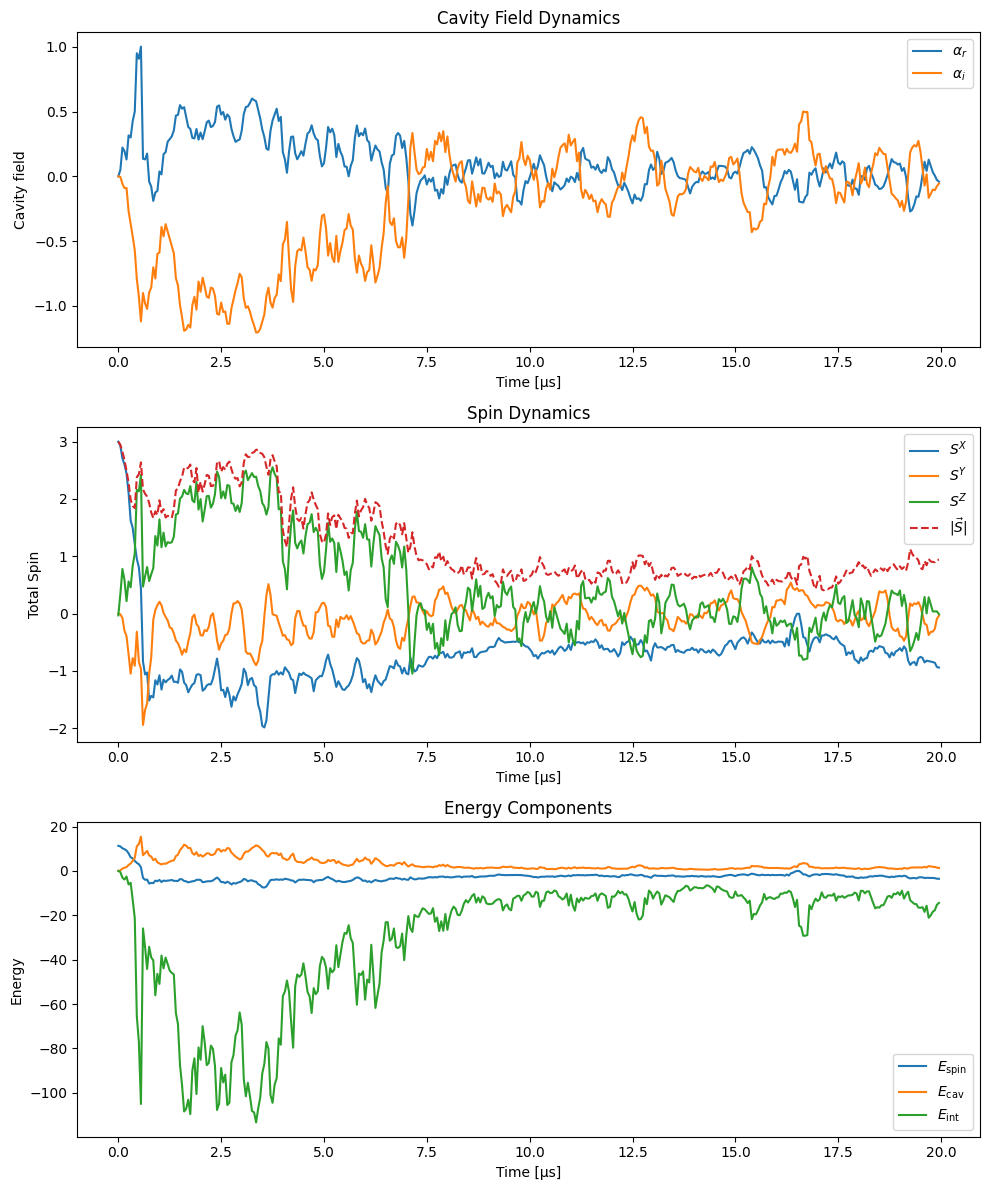

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from qutip import *

# --- Parallel execution and initial condition ---
num_traj = 10
ini_spin = "fixed OP"

pi = np.pi
# --- System parameters ---
delta = -2 * pi * 1.0
kappa = 2 * pi * 1.0 
omega_L = 2 * pi * 0.6
Gamma = 2 * pi * 6.0 /10
Delta = -2 * pi * 80.0
g = 2 * pi * 3.0
g_eff = 2 * pi * 0.55
N = 6  # number of spins
Omega = 3 * Delta * g_eff / g
 
# --- Time grid ---
t_max = 20
dt = 0.05
tlist = np.arange(0, t_max, dt)

# --- Fock space truncation ---
M = 25

# --- Prefactors ---
A_pref = np.sqrt(Gamma) / (6 * abs(Delta))
B1_pref = np.sqrt(Gamma) / (2 * np.sqrt(2) * abs(Delta))
B2_pref = np.sqrt(Gamma) / (6 * np.sqrt(2) * abs(Delta))
# g1 = 2 * g
# g2 = 2 * g

# --- Elementary operators ---
sm = destroy(2)
sp = sm.dag()
sz = sigmaz()
P_up = sp * sm
P_down = sm * sp
a = destroy(M)

I2 = qeye(2)
IM = qeye(M)

# --- Embedding helpers ---
def embed_spin(op, n):
    ops = [I2] * N + [IM]
    ops[n] = op
    return tensor(ops)

def embed_cavity(op):
    return tensor([I2] * N + [op])

#########################
def random_spinor_on_bloch_sphere(seed=None):
    rng = np.random.default_rng(seed)
    theta = np.arccos(2 * rng.random() - 1)
    phi = 2 * np.pi * rng.random()
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    return spinor

# --- Collapse operators ---
c_ops = []
for n in range(N):
    σ_plus = embed_spin(sp, n)
    σ_minus = embed_spin(sm, n)
    P_up_n = embed_spin(P_up, n)
    P_down_n = embed_spin(P_down, n)
    a_op = embed_cavity(a)

    L_ud = A_pref * (Omega * σ_plus - 2j * g * σ_plus * a_op)
    L_du = A_pref * (Omega * σ_minus +2j * g * σ_minus * a_op)
    L1_uu = B1_pref * (Omega * P_up_n - 2j * g * P_up_n * a_op)
    L1_dd = B1_pref * (Omega * P_down_n + 2j * g * P_down_n * a_op)
    L2_uu = B2_pref * (Omega * P_up_n + 2j * g * P_up_n * a_op)
    L2_dd = B2_pref * (Omega * P_down_n - 2j * g * P_down_n * a_op)

    c_ops += [L_ud, L_du, L1_uu, L1_dd, L2_uu, L2_dd]

c_ops.append(np.sqrt(kappa) * embed_cavity(a))

# --- Hamiltonian ---
H = -delta * embed_cavity(a.dag() * a)
for n in range(N):
    H += omega_L * 0.5* embed_spin(sigmax(), n)
    H += g_eff * 0.5* embed_spin(sz, n) * (embed_cavity(1j*a.dag() - 1j* a))

# --- Initial state ---
if ini_spin == "fixed OP":
    theta = np.pi / 2 + 0.01
    phi = np.pi *0
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random OP":
    spinor = random_spinor_on_bloch_sphere(seed=42)
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random":
    spin_states = [random_spinor_on_bloch_sphere(seed=42 + 13 * i ** 2) for i in range(N)]

else:  # fallback
    spin_states = [basis(2, 1)] * N  # all down


psi_spin = tensor(spin_states)
psi_cavity = basis(M, 0)
psi0 = tensor(psi_spin, psi_cavity)

# --- Observables ---
a_op = embed_cavity(a)
Sx_op = 0.5* sum([embed_spin(sigmax(), n) for n in range(N)])
Sy_op = 0.5* sum([embed_spin(sigmay(), n) for n in range(N)])
Sz_op = 0.5* sum([embed_spin(sigmaz(), n) for n in range(N)])

# --- Solver options ---
opts = {
    "method": "euler",
    "normalize_output": True,
    "store_states": True,
    "progress_bar": "text"
}

# --- Solve (1 trajectory for now) ---
result = ssesolve(
    H,
    psi0,
    tlist,
    sc_ops=c_ops,
    e_ops=[],
    ntraj=1,
    options=opts
)

# --- Extract expectations ---
states = result.states
t = np.array(result.times)

alpha_r = expect((a_op + a_op.dag()) / 2, states)
alpha_i = expect(1j * (a_op.dag() - a_op) / 2, states)

Sx = expect(Sx_op, states)
Sy = expect(Sy_op, states)
Sz = expect(Sz_op, states)
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

E_spin = omega_L * Sx
E_cav = -delta * expect(a_op.dag() * a_op, states)
E_int = g * expect(Sz_op * 1j*(-a_op + a_op.dag()), states)

# --- Plot ---
plt.figure(figsize=(10, 12))

# Cavity fields
plt.subplot(3, 1, 1)
plt.plot(t, alpha_r, label=r'$\alpha_r$')
plt.plot(t, alpha_i, label=r'$\alpha_i$')
plt.xlabel('Time [µs]')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# Spin components
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^X$')
plt.plot(t, Sy, label=r'$S^Y$')
plt.plot(t, Sz, label=r'$S^Z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time [µs]')
plt.ylabel('Total Spin')
plt.title('Spin Dynamics')
plt.legend()

# Energy
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_{\mathrm{spin}}$')
plt.plot(t, E_cav, label=r'$E_{\mathrm{cav}}$')
plt.plot(t, E_int, label=r'$E_{\mathrm{int}}$')
plt.xlabel('Time [µs]')
plt.ylabel('Energy')
plt.title('Energy Components')
plt.legend()

plt.tight_layout()
plt.show()


## Liouvillian and so on

In [ ]:
from qutip import liouvillian


L_superop = liouvillian(H, c_ops)

In [ ]:
from scipy.sparse.linalg import eigs
import scipy.sparse

k = 6  # number of eigenvalues to compute

L_scipy_sparse = L_superop.data.as_scipy()
# L_sparse is your scipy.sparse.csr_matrix Liouvillian

# # To get eigenvalues with largest magnitude (default)
# vals, vecs = eigs(L_sparse, k=k)
# print("Eigenvalues with largest magnitude:", vals)

# To get eigenvalues closest to zero (smallest absolute value),
# use the 'sigma' parameter with shift-invert mode:
vals_smallest, vecs_smallest = eigs(L_scipy_sparse, k=k, sigma=0, which='LM')

print("Eigenvalues closest to zero:", vals_smallest)